PROJETO E-COMMERCE ROUPAS: SÉRIE TEMPORAL

DATASET PUBLICO: FONTE KAGGLE.COM

OBJETIVO DO PROJETO: Investigar as tendências baseadas em tempo em sessões de visitantes, eventos ATC e conversões.

In [2]:
# Pacotes necessários para este projeto de análise de séries temporais:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import warnings

# Ignorar warnings
warnings.filterwarnings('ignore')

# Definir estilo dos gráficos
plt.style.use('seaborn-v0_8-darkgrid')

print("Estilo atualizado com sucesso!")



Estilo atualizado com sucesso!


In [3]:
# Carregar o dataset (ajuste o nome do arquivo se necessário)
df = pd.read_excel('dataset_ecommerce_roupas.xls')

# Exibir as primeiras linhas do dataframe
df.head()

Cloth_type_color  visitors  sessions         duration  total_bounce_rate  \
0       polo-black      1605      1741  1m58.100516944s            0.60310   
1      Jacket-blue       295       342  1m49.245614035s            0.55263   
2    Trouser-white        53        60          1m10.3s            0.78333   
3      Jacket-rust       261       288  1m49.118055555s            0.45138   
4   Sweatshirt-red       168       174  1m28.632183908s            0.50574   

   total_carts  total_checkouts  total_conversion  total_orders_placed  \
0           30               18           0.00344                    6   
1           10                4           0.00584                    2   
2            1                0           0.00000                    0   
3            4                1           0.00000                    0   
4            4                0           0.00000                    0   

   total_pageviews  
0             5140  
1             1052  
2               97  
3              987  
4              508

In [4]:
# Verificar o tipo de dados de cada coluna no dataframe
df.dtypes



Cloth_type_color        object
visitors                 int64
sessions                 int64
duration                object
total_bounce_rate      float64
total_carts              int64
total_checkouts          int64
total_conversion       float64
total_orders_placed      int64
total_pageviews          int64
dtype: object

In [5]:
# Dicionário com a descrição das colunas do dataset
colunas_descricao = {
    'Cloth_type_color': 'Tipo e cor da roupa',
    'visitors': 'Número de visitantes',
    'sessions': 'Número de sessões',
    'duration': 'Duração média da sessão (em segundos)',
    'total_bounce_rate': 'Taxa de rejeição total',
    'total_carts': 'Número total de carrinhos criados',
    'total_checkouts': 'Número total de checkouts',
    'total_conversion': 'Taxa de conversão total',
    'total_orders_placed': 'Número total de pedidos realizados',
    'total_pageviews': 'Número total de visualizações de página'
}

# Exibir o dicionário
colunas_descricao


{'Cloth_type_color': 'Tipo e cor da roupa',
 'visitors': 'Número de visitantes',
 'sessions': 'Número de sessões',
 'duration': 'Duração média da sessão (em segundos)',
 'total_bounce_rate': 'Taxa de rejeição total',
 'total_carts': 'Número total de carrinhos criados',
 'total_checkouts': 'Número total de checkouts',
 'total_conversion': 'Taxa de conversão total',
 'total_orders_placed': 'Número total de pedidos realizados',
 'total_pageviews': 'Número total de visualizações de página'}

In [6]:
# Mostrar o conteúdo da coluna 'duration'
df['duration']


0       1m58.100516944s
1       1m49.245614035s
2               1m10.3s
3       1m49.118055555s
4       1m28.632183908s
             ...       
1234    4m10.256410256s
1235      31.574468085s
1236              3m27s
1237    1m28.727272727s
1238           2m48.75s
Name: duration, Length: 1239, dtype: object

In [7]:
# Verificar se há valores fora do padrão "XmYs"
df['duration'].unique()


array(['1m58.100516944s', '1m49.245614035s', '1m10.3s', ..., '3m27s',
       '1m28.727272727s', '2m48.75s'], dtype=object)

In [8]:
import pandas as pd

# Função ajustada para lidar com variações no formato da duração
def converter_para_timedelta(duracao):
    try:
        # Separar minutos e segundos
        partes = duracao.replace('s', '').split('m')
        
        # Verificar se há segundos com fração e converter corretamente
        minutos = float(partes[0])
        segundos = float(partes[1]) if len(partes) > 1 and partes[1] != '' else 0
        
        # Calcular o total em segundos
        total_segundos = minutos * 60 + segundos
        
        # Retornar como timedelta
        return pd.to_timedelta(total_segundos, unit='s')
    except (IndexError, ValueError):
        return pd.NaT  # Retornar NaT se o valor não estiver no formato esperado

# Aplicar a função na coluna 'duration' e substituir os valores
df['duration'] = df['duration'].apply(converter_para_timedelta)

# Verificar a conversão
df['duration'].head()


0   0 days 00:01:58.100516944
1   0 days 00:01:49.245614035
2      0 days 00:01:10.300000
3   0 days 00:01:49.118055555
4   0 days 00:01:28.632183908
Name: duration, dtype: timedelta64[ns]

In [9]:
# Verificar valores nulos nas colunas numéricas
valores_nulos_numericos = df.select_dtypes(include=[np.number]).isnull().sum()

# Exibir as colunas numéricas com seus respectivos valores nulos
valores_nulos_numericos


visitors               0
sessions               0
duration               0
total_bounce_rate      0
total_carts            0
total_checkouts        0
total_conversion       0
total_orders_placed    0
total_pageviews        0
dtype: int64

In [10]:
df

Cloth_type_color  visitors  sessions                  duration  \
0          polo-black      1605      1741 0 days 00:01:58.100516944   
1         Jacket-blue       295       342 0 days 00:01:49.245614035   
2       Trouser-white        53        60    0 days 00:01:10.300000   
3         Jacket-rust       261       288 0 days 00:01:49.118055555   
4      Sweatshirt-red       168       174 0 days 00:01:28.632183908   
...               ...       ...       ...                       ...   
1234     Trouser-blue        30        39 0 days 00:04:10.256410256   
1235      polo-purple        26        47 0 days 00:31:34.468085100   
1236     Trouser-navy        21        27           0 days 00:03:27   
1237    t-shirt-white        20        22 0 days 00:01:28.727272727   
1238     t-shirt-pink         4         4    0 days 00:02:48.750000   

      total_bounce_rate  total_carts  total_checkouts  total_conversion  \
0               0.60310           30               18           0.00344   
1               0.55263           10                4           0.00584   
2               0.78333            1                0           0.00000   
3               0.45138            4                1           0.00000   
4               0.50574            4                0           0.00000   
...                 ...          ...              ...               ...   
1234            0.61538            3                2           0.00000   
1235            0.82978            1                0           0.00000   
1236            0.66666            3                0           0.00000   
1237            0.63636            1                0           0.00000   
1238            0.50000            0                0           0.00000   

      total_orders_placed  total_pageviews  
0                       6             5140  
1                       2             1052  
2                       0               97  
3                       0              987  
4                       0              508  
...                   ...              ...  
1234                    0              249  
1235                    0               82  
1236                    0               77  
1237                    0               45  
1238                    0               42  

[1239 rows x 10 columns]

In [11]:
# Função para detectar outliers usando o método IQR
def detectar_outliers(df):
    outliers = {}
    for coluna in df.select_dtypes(include=[np.number]).columns:
        Q1 = df[coluna].quantile(0.25)
        Q3 = df[coluna].quantile(0.75)
        IQR = Q3 - Q1
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR
        outliers[coluna] = df[(df[coluna] < limite_inferior) | (df[coluna] > limite_superior)][coluna]
    
    return outliers



In [12]:
# Aplicar a função para encontrar os outliers
outliers_detectados = detectar_outliers(df)

# Exibir os outliers detectados por coluna
outliers_detectados


{'visitors': 0       1605
 10      1100
 22      1606
 24      1238
 26      1332
         ... 
 1203    1112
 1206    1049
 1212     987
 1219    1505
 1225    2379
 Name: visitors, Length: 153, dtype: int64,
 'sessions': 0       1741
 10      1234
 22      1729
 24      1336
 26      1540
         ... 
 1203    1217
 1206    1212
 1212    1027
 1219    1576
 1225    2590
 Name: sessions, Length: 159, dtype: int64,
 'duration': 8      0 days 00:31:11.428571400
 9                0 days 00:46:30
 13     0 days 00:53:11.052631560
 16               0 days 00:44:00
 20     0 days 00:22:08.181818160
                   ...           
 1215   0 days 00:39:55.792207740
 1216   0 days 00:41:27.272727240
 1228   0 days 00:58:24.999999960
 1230   0 days 00:47:30.756302520
 1235   0 days 00:31:34.468085100
 Name: duration, Length: 270, dtype: timedelta64[ns],
 'total_bounce_rate': 9       0.00000
 16      0.33333
 38      0.96428
 41      1.00000
 53      0.30000
 74      1.00000
 88      1.00000


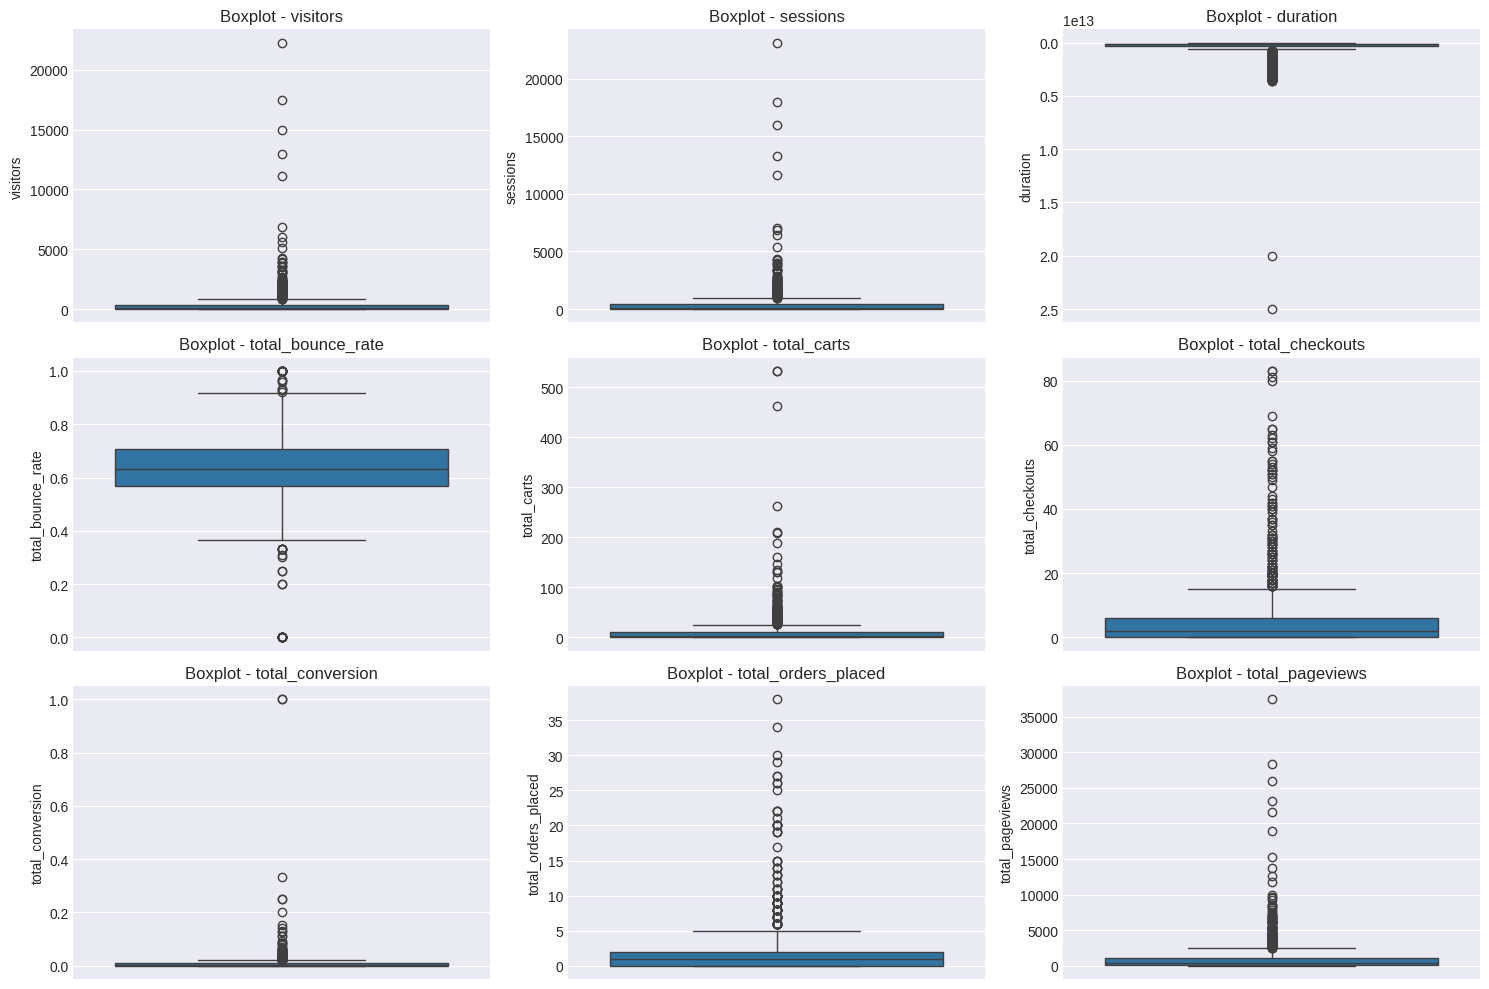

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Definir o tamanho dos gráficos
plt.figure(figsize=(15, 10))

# Percorrer as colunas numéricas e gerar os boxplots
for i, coluna in enumerate(df.select_dtypes(include=[np.number]).columns, 1):
    plt.subplot(3, 3, i)  # Organizar os gráficos em uma grade de 3x3
    sns.boxplot(y=df[coluna])
    plt.title(f'Boxplot - {coluna}')
    plt.tight_layout()

# Exibir os gráficos
plt.show()


In [14]:
# Função para calcular o percentual de outliers por coluna e o total no dataset
def calcular_percentual_outliers(df):
    percentuais = {}
    total_linhas = len(df)
    total_outliers = 0

    for coluna in df.select_dtypes(include=[np.number]).columns:
        Q1 = df[coluna].quantile(0.25)
        Q3 = df[coluna].quantile(0.75)
        IQR = Q3 - Q1
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR
        
        # Contar o número de outliers na coluna
        num_outliers = df[(df[coluna] < limite_inferior) | (df[coluna] > limite_superior)][coluna].count()
        
        # Percentual de outliers na coluna (em relação ao número total de linhas da coluna)
        percentuais[coluna] = (num_outliers / total_linhas) * 100
        
        # Somar o total de outliers
        total_outliers += num_outliers

    # Calcular o percentual total de outliers (em relação ao total de valores no dataset)
    total_valores = total_linhas * len(df.select_dtypes(include=[np.number]).columns)
    percentual_total_outliers = (total_outliers / total_valores) * 100
    
    return percentuais, percentual_total_outliers

# Calcular os percentuais de outliers por coluna e o percentual total
percentual_outliers_colunas, percentual_total_outliers = calcular_percentual_outliers(df)

# Exibir os percentuais
percentual_outliers_colunas, percentual_total_outliers


({'visitors': 12.34866828087167,
  'sessions': 12.832929782082324,
  'duration': 21.791767554479417,
  'total_bounce_rate': 4.681194511702986,
  'total_carts': 11.864406779661017,
  'total_checkouts': 9.846650524616626,
  'total_conversion': 8.393866020984666,
  'total_orders_placed': 9.76594027441485,
  'total_pageviews': 11.218724778046813},
 11.416016500762263)

Percentual de outliers por coluna:

visitors: 12.35%
sessions: 12.83%
duration: 21.79%
total_bounce_rate: 4.68%
total_carts: 11.86%
total_checkouts: 9.85%
total_conversion: 8.39%
total_orders_placed: 9.77%
total_pageviews: 11.22%
Percentual total de outliers no dataset: 11.42%

In [16]:
# Mostrar o número de linhas e colunas do dataframe
df.shape


(1239, 10)

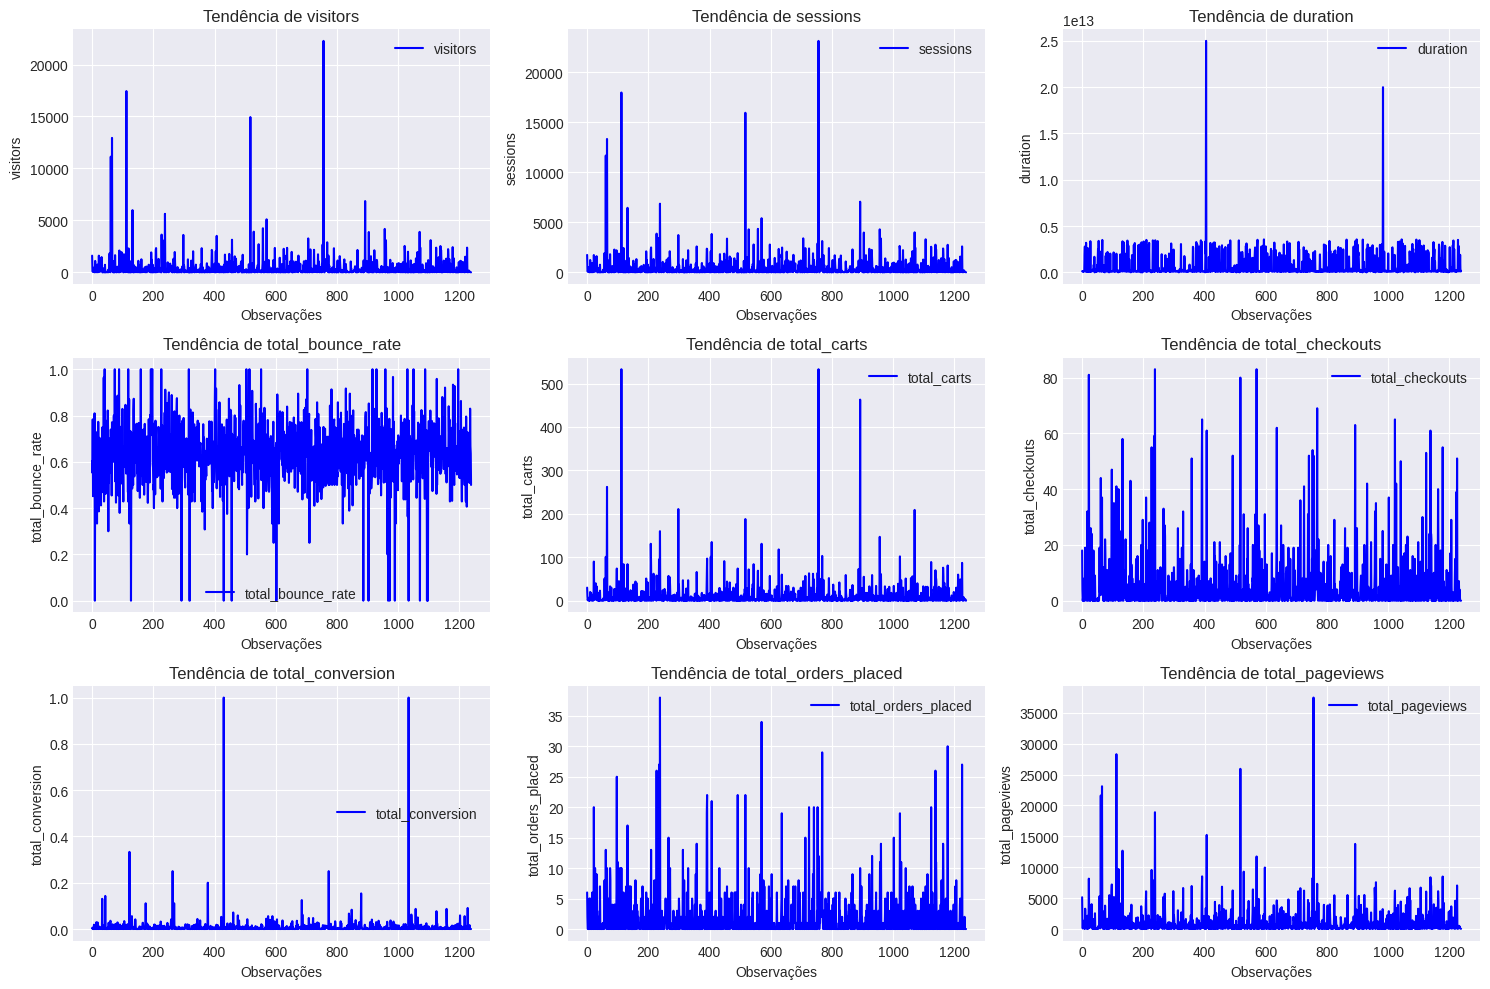

In [17]:
import matplotlib.pyplot as plt

# Definir o tamanho do gráfico
plt.figure(figsize=(15, 10))

# Lista de colunas numéricas importantes para analisar a tendência
colunas = ['visitors', 'sessions', 'duration', 'total_bounce_rate', 
           'total_carts', 'total_checkouts', 'total_conversion', 
           'total_orders_placed', 'total_pageviews']

# Criar gráficos de tendência para cada uma dessas colunas
for i, coluna in enumerate(colunas, 1):
    plt.subplot(3, 3, i)  # Organizar os gráficos em uma grade de 3x3
    plt.plot(df[coluna], label=coluna, color='b')
    plt.title(f'Tendência de {coluna}')
    plt.xlabel('Observações')
    plt.ylabel(coluna)
    plt.legend()

# Ajustar o layout e exibir os gráficos
plt.tight_layout()
plt.show()


In [18]:
# Verificar o tipo da coluna 'duration'
df['duration'].dtype


dtype('<m8[ns]')

In [19]:
# vou converter a coluna duration para MINUTOS

In [20]:
# Converter timedelta para minutos
df['tempo_minutos'] = df['duration'].dt.total_seconds() / 60  # Converte para minutos

# Verificar as primeiras linhas
df[['duration', 'tempo_minutos']].head()


duration  tempo_minutos
0 0 days 00:01:58.100516944       1.968342
1 0 days 00:01:49.245614035       1.820760
2    0 days 00:01:10.300000       1.171667
3 0 days 00:01:49.118055555       1.818634
4 0 days 00:01:28.632183908       1.477203

In [21]:
# Calcular o total de tempo em minutos na coluna 'tempo_minutos'
total_minutos = df['tempo_minutos'].sum()

# Exibir o total de minutos
total_minutos

13225.31583058835

O total de tempo na coluna tempo_minutos é 13.225 minutos (aproximadamente 220 horas ou cerca de 9 dias).

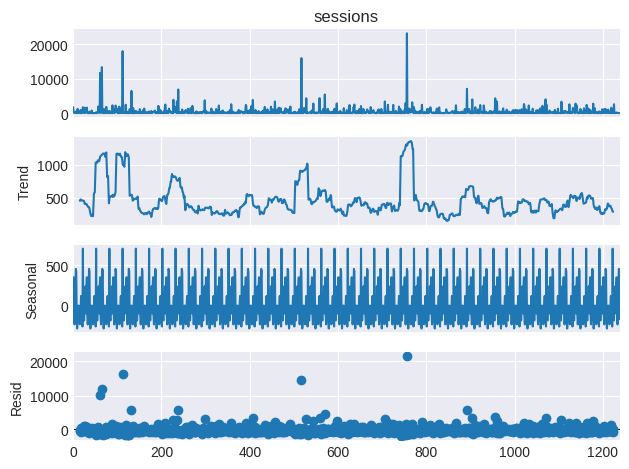

(0   NaN
 1   NaN
 2   NaN
 3   NaN
 4   NaN
 Name: trend, dtype: float64,
 0    204.889580
 1    351.913330
 2   -113.953753
 3   -229.845420
 4   -140.090837
 Name: seasonal, dtype: float64,
 0   NaN
 1   NaN
 2   NaN
 3   NaN
 4   NaN
 Name: resid, dtype: float64)

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Ajustar o período para 30 minutos (meia hora)
result = seasonal_decompose(df['sessions'], model='additive', period=30)

# Plotar os componentes da decomposição (tendência, sazonalidade e resíduos)
result.plot()
plt.show()

# Acessar os componentes da decomposição separadamente
tendencia = result.trend
sazonalidade = result.seasonal
residuos = result.resid

# Visualizar as primeiras linhas dos componentes ajustados
tendencia.head(), sazonalidade.head(), residuos.head()


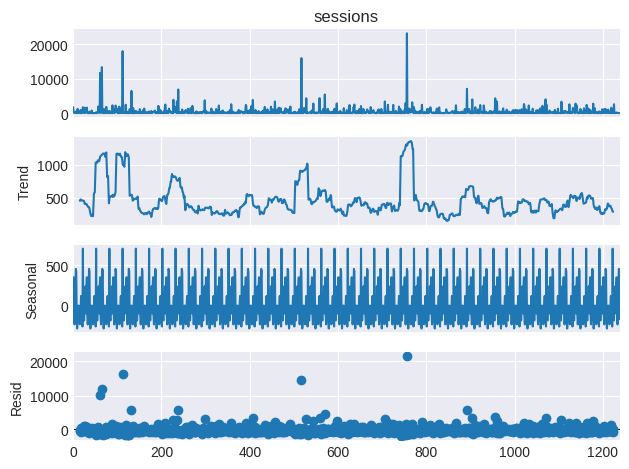

In [24]:

# Ajustar o período para 30 minutos
result = seasonal_decompose(df['sessions'], model='additive', period=30)

# Plotar os componentes da decomposição (tendência, sazonalidade e resíduos)
result.plot()
plt.show()

# Acessar os componentes da decomposição separadamente
tendencia = result.trend
sazonalidade = result.seasonal
residuos = result.resid

RESOLVI DESSE PONTO EM DIANTE TRATAR OS OUTLIERS PARA VER SE A DECOMPOSIÇÃO VAI SE AJUSTAR MELHOR.

In [26]:
import numpy as np

# Função para capear outliers com tratamento especial para a coluna 'duration'
def capear_outliers(df):
    for coluna in df.select_dtypes(include=[np.number, 'timedelta']).columns:
        
        # Tratar a coluna 'duration' como minutos antes de aplicar o capping
        if coluna == 'duration':
            # Converter 'duration' para minutos
            df['duration_minutos'] = df['duration'].dt.total_seconds() / 60
            Q1 = df['duration_minutos'].quantile(0.25)
            Q3 = df['duration_minutos'].quantile(0.75)
            IQR = Q3 - Q1
            limite_inferior = Q1 - 1.5 * IQR
            limite_superior = Q3 + 1.5 * IQR
            # Aplicar capping na coluna convertida
            df['duration_minutos'] = np.where(df['duration_minutos'] < limite_inferior, limite_inferior, df['duration_minutos'])
            df['duration_minutos'] = np.where(df['duration_minutos'] > limite_superior, limite_superior, df['duration_minutos'])
            # Reconverter de volta para timedelta
            df['duration'] = pd.to_timedelta(df['duration_minutos'], unit='m')
            df.drop(columns=['duration_minutos'], inplace=True)
        
        else:
            # Aplicar capping para colunas numéricas
            Q1 = df[coluna].quantile(0.25)
            Q3 = df[coluna].quantile(0.75)
            IQR = Q3 - Q1
            limite_inferior = Q1 - 1.5 * IQR
            limite_superior = Q3 + 1.5 * IQR
            df[coluna] = np.where(df[coluna] < limite_inferior, limite_inferior, df[coluna])
            df[coluna] = np.where(df[coluna] > limite_superior, limite_superior, df[coluna])

    return df

# Aplicar a função de capping no dataset
df_capeado = capear_outliers(df.copy())

# Exibir a descrição dos dados para verificar o impacto do capping
df_capeado.describe()


visitors     sessions                   duration  total_bounce_rate  \
count  1239.000000  1239.000000                       1239        1239.000000   
mean    246.175747   273.464689  0 days 00:04:03.612106195           0.636271   
std     297.365677   325.102010  0 days 00:03:44.873074652           0.117410   
min       1.000000     1.000000            0 days 00:00:00           0.354380   
25%      24.000000    29.000000  0 days 00:01:31.606114104           0.566660   
50%     103.000000   119.000000  0 days 00:02:06.386538462           0.633460   
75%     361.500000   395.500000  0 days 00:05:13.024390242           0.708180   
max     867.750000   945.250000  0 days 00:10:45.151804452           0.920460   

       total_carts  total_checkouts  total_conversion  total_orders_placed  \
count  1239.000000      1239.000000       1239.000000          1239.000000   
mean      6.836965         3.959645          0.005075             1.336562   
std       8.555958         4.983007          0.006860             1.743359   
min       0.000000         0.000000          0.000000             0.000000   
25%       0.000000         0.000000          0.000000             0.000000   
50%       3.000000         2.000000          0.000840             1.000000   
75%      10.000000         6.000000          0.008300             2.000000   
max      25.000000        15.000000          0.020750             5.000000   

       total_pageviews  tempo_minutos  
count      1239.000000    1239.000000  
mean        709.963075       4.060202  
std         842.376076       3.747885  
min           1.000000       0.000000  
25%          80.000000       1.526769  
50%         324.000000       2.106442  
75%        1053.500000       5.217073  
max        2513.750000      10.752530

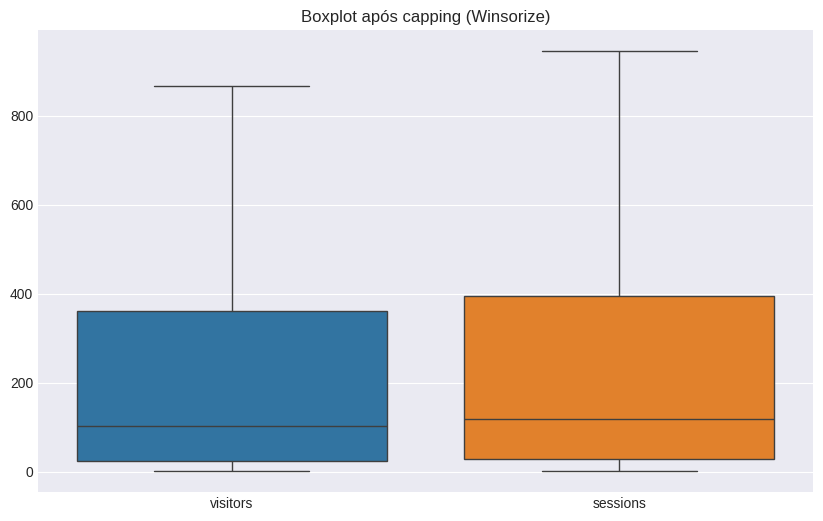

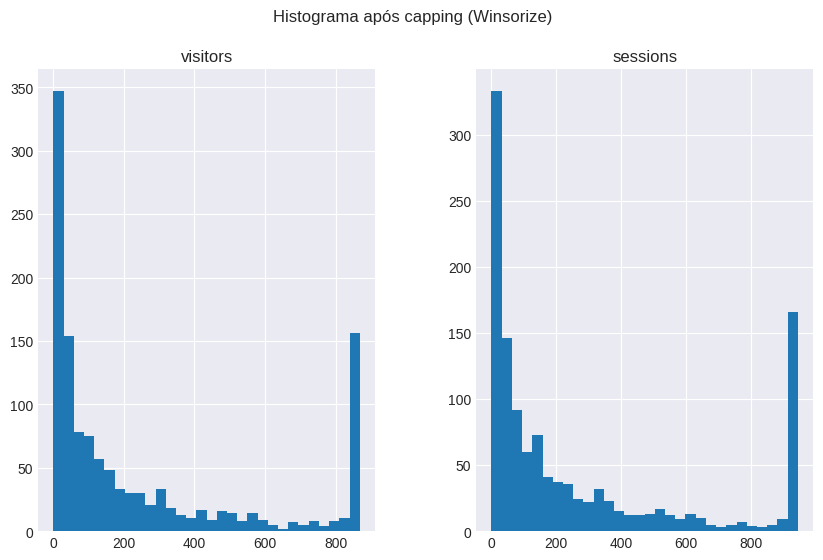

In [27]:
# Boxplot para verificar os outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_capeado[['visitors', 'sessions', 'duration']])
plt.title('Boxplot após capping (Winsorize)')
plt.show()

# Histograma para ver a distribuição após capping
df_capeado[['visitors', 'sessions', 'duration']].hist(bins=30, figsize=(10, 6))
plt.suptitle('Histograma após capping (Winsorize)')
plt.show()


In [28]:
# agora vou fazer uma nova decomposição da série para seguir com o projeto

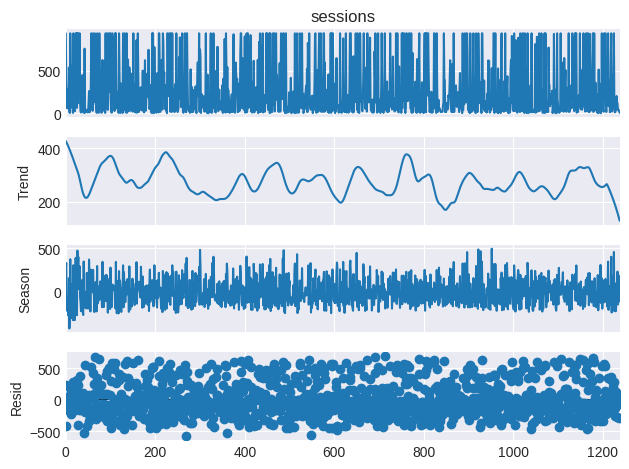

(0    428.168171
 1    424.786804
 2    421.307497
 3    417.727054
 4    414.044890
 Name: trend, dtype: float64,
 0    277.173484
 1    329.603124
 2   -220.884219
 3   -173.906698
 4   -218.480357
 Name: season, dtype: float64,
 0    239.908345
 1   -412.389928
 2   -140.423278
 3     44.179644
 4    -21.564533
 Name: resid, dtype: float64)

In [29]:
from statsmodels.tsa.seasonal import STL
import matplotlib.pyplot as plt

# Aplicar o STL (Seasonal-Trend decomposition using LOESS)
stl = STL(df_capeado['sessions'], period=30)  # Ajuste o período conforme necessário
result_stl = stl.fit()

# Plotar os componentes
result_stl.plot()
plt.show()

# Acessar os componentes
tendencia_stl = result_stl.trend
sazonalidade_stl = result_stl.seasonal
residuos_stl = result_stl.resid

# Exibir as primeiras linhas dos componentes
tendencia_stl.head(), sazonalidade_stl.head(), residuos_stl.head()


In [30]:
# ABAIXO COM CICLO MAIOR, TOTAL DE 24HORAS

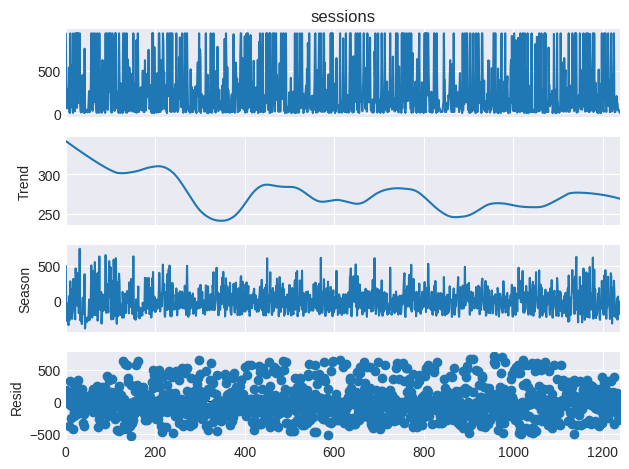

(0    341.591447
 1    341.173879
 2    340.757379
 3    340.341941
 4    339.927558
 Name: trend, dtype: float64,
 0    500.336421
 1   -176.994979
 2   -301.573890
 3    -47.727905
 4   -174.062219
 Name: season, dtype: float64,
 0    103.322132
 1    177.821099
 2     20.816511
 3     -4.614036
 4      8.134661
 Name: resid, dtype: float64)

In [31]:
from statsmodels.tsa.seasonal import STL
import matplotlib.pyplot as plt

# Aplicar o STL com um período de 120 minutos (2 horas)
stl = STL(df_capeado['sessions'], period=120)
result_stl = stl.fit()

# Plotar os componentes
result_stl.plot()
plt.show()

# Acessar os componentes da decomposição
tendencia_stl = result_stl.trend
sazonalidade_stl = result_stl.seasonal
residuos_stl = result_stl.resid

# Visualizar as primeiras linhas dos componentes ajustados
tendencia_stl.head(), sazonalidade_stl.head(), residuos_stl.head()


Tendência (Trend):
A tendência está capturando pequenas variações ao longo do tempo, indicando um comportamento mais suave. Os valores variam lentamente, mostrando um leve declínio, mas de forma estável.
Isso sugere que, em intervalos de 2 horas, o tráfego de sessões está relativamente estável, com pequenas quedas.
Essas flutuações pequenas podem ser sinais de variações de curto prazo que são difíceis de capturar em períodos mais longos (como 24 horas).
2. Sazonalidade (Seasonal):
A sazonalidade agora captura variações mais frequentes, com grandes oscilações entre picos positivos e negativos.
Os valores variam entre 500 e -300, o que indica que há ciclos de aumento e diminuição de tráfego claros em um intervalo de 2 horas.
Isso pode indicar picos de tráfego recorrentes em algumas partes do dia, seguidos por quedas mais bruscas, o que pode ser interessante para entender a dinâmica do comportamento dos visitantes.
3. Resíduos (Residuals):
Os resíduos mostram variações moderadas, sugerindo que boa parte dos dados foi explicada pelos componentes de tendência e sazonalidade.
Há alguns picos nos resíduos, o que pode indicar eventos esporádicos ou variações no tráfego que não seguem os padrões sazonais e de tendência. Entretanto, os resíduos estão mais controlados do que em ciclos maiores, o que é um bom sinal de que o STL está capturando bem a maior parte dos padrões.

In [33]:
# VAMOS PARA A PREVISÃO NO PERÍODO DE 30 CICLOS DE 2H CADA = TOTAL E 60 HORAS

MAE: 314.0866
RMSE: 417.1593
R²: -0.6320


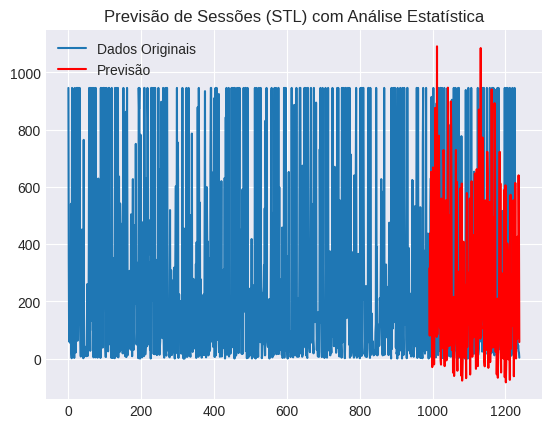

In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Dividir os dados em treino e teste
train_size = int(len(df_capeado) * 0.8)  # Usando 80% dos dados para treino
train, test = df_capeado['sessions'][:train_size], df_capeado['sessions'][train_size:]

# Realizar a decomposição STL no conjunto de treino
stl_train = STL(train, period=120).fit()

# Extrapolar a tendência e repetir a sazonalidade no conjunto de teste
n_test_periods = len(test)
tendencia_futura = np.poly1d(np.polyfit(np.arange(len(stl_train.trend.dropna())), stl_train.trend.dropna(), 1))
tendencia_previsao = tendencia_futura(np.arange(len(stl_train.trend), len(stl_train.trend) + n_test_periods))

# Repetir a sazonalidade no conjunto de teste
periodo_sazonal = 120  # Ciclo de 2 horas
sazonalidade_previsao = np.tile(stl_train.seasonal[-periodo_sazonal:], int(np.ceil(n_test_periods / periodo_sazonal)))[:n_test_periods]

# Somar a tendência e sazonalidade para gerar a previsão
previsao_futura = tendencia_previsao + sazonalidade_previsao

# Calcular os coeficientes de avaliação (estatísticas)
mae = mean_absolute_error(test, previsao_futura)
rmse = np.sqrt(mean_squared_error(test, previsao_futura))
r2 = r2_score(test, previsao_futura)

# Exibir os coeficientes
print(f'MAE: {mae:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'R²: {r2:.4f}')

# Plotar os resultados
plt.plot(np.arange(len(df_capeado['sessions'])), df_capeado['sessions'], label='Dados Originais')
plt.plot(np.arange(train_size, len(df_capeado['sessions'])), previsao_futura, label='Previsão', color='red')
plt.legend()
plt.title('Previsão de Sessões (STL) com Análise Estatística')
plt.show()


In [35]:
# abaixo vou usar o XGBosst para regressão pois o Prophet precisa de coluna Data o que nao temos nesse dataset

RMSE: 4.178728466486831
R²: -0.13084714695169564


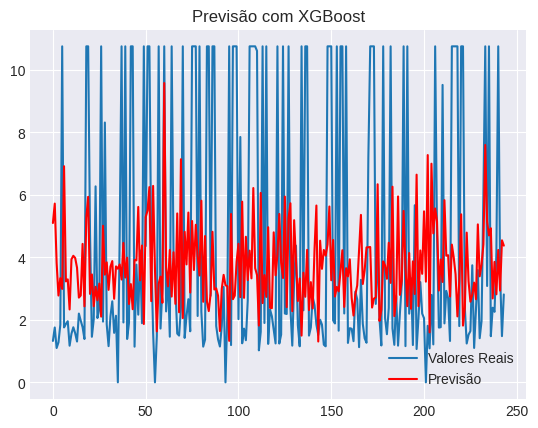

In [36]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Verificar se a coluna 'tempo_minutos' existe no dataframe
if 'tempo_minutos' not in df_capeado.columns:
    print("Erro: A coluna 'tempo_minutos' não existe no dataframe.")
else:
    # Função para criar lags (valores anteriores)
    def create_lagged_features(data, lag=1):
        df = pd.DataFrame(data)
        for i in range(1, lag + 1):
            df[f'lag_{i}'] = df['tempo_minutos'].shift(i)  # Corrigido para acessar a coluna pelo nome
        return df.dropna()

    # Criar lags da variável 'tempo_minutos' (ajuste o número de lags conforme necessário)
    lagged_data = create_lagged_features(df_capeado[['tempo_minutos']], lag=20)

    # Dividir o dataset em treino e teste
    X = lagged_data.iloc[:, 1:]  # Lags (valores anteriores)
    y = lagged_data.iloc[:, 0]   # Valor atual (tempo_minutos)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    # Definir o modelo XGBoost
    # model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100)
    model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=200, learning_rate=0.05, max_depth=5)

    # Treinar o modelo
    model.fit(X_train, y_train)

    # Fazer previsões
    y_pred = model.predict(X_test)

    # Avaliar o modelo
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)

    print(f"RMSE: {rmse}")
    print(f"R²: {r2}")

    # Plotar as previsões vs valores reais
    import matplotlib.pyplot as plt
    plt.plot(y_test.reset_index(drop=True), label='Valores Reais')
    plt.plot(y_pred, label='Previsão', color='red')
    plt.legend()
    plt.title('Previsão com XGBoost')
    plt.show()


In [37]:
# ambos os algoritimos apresentaram péssimos resultados, vamos para outra abordagem

In [38]:
# !pip install tensorflow
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Normalizar os dados
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df_capeado[['tempo_minutos']])

# Função para criar as features com base em lags (sequências temporais)
def create_lstm_features(data, lags=20):
    X, y = [], []
    for i in range(lags, len(data)):
        X.append(data[i-lags:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

# Criar features para LSTM com 20 lags
X, y = create_lstm_features(scaled_data, lags=20)

# Dividir em treino e teste (80% treino, 20% teste)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape para formato [amostras, lags, features] para o LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Construir o modelo LSTM
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))

# Compilar o modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Treinar o modelo
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Fazer previsões
y_pred = model.predict(X_test)

# Desnormalizar os dados para comparar com os valores reais
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform([y_test])

# Calcular RMSE
rmse = np.sqrt(mean_squared_error(y_test[0], y_pred[:, 0]))
print(f"RMSE LSTM: {rmse}")


2024-10-01 09:44:41.348545: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-01 09:44:41.351712: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-01 09:44:41.359969: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-01 09:44:41.373149: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-01 09:44:41.376936: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-01 09:44:41.386895: I tensorflow/core/platform/cpu_feature_gu

Epoch 1/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1544
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1243
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1280
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1200
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1246
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1229
Epoch 7/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1227
Epoch 8/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1132
Epoch 9/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1114
Epoch 10/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1278
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
RMSE LSTM: 4.028362905589907


Epoch 1/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.1551
Epoch 2/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.1179
Epoch 3/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1214
Epoch 4/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1213
Epoch 5/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.1288
Epoch 6/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.1180
Epoch 7/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.1168
Epoch 8/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.1218
Epoch 9/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1169
Epoch 10/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1205
Epoch 11/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1213
Epoch 12/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1145
Epoch 13/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1222
Epoch 14/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.1202
Epoch 15/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1141
Epoc

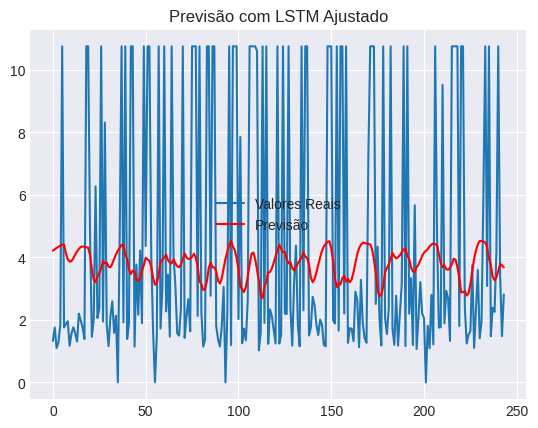

In [39]:
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.metrics import mean_squared_error

# Normalizar os dados
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df_capeado[['tempo_minutos']])

# Função para criar as features com base em lags (sequências temporais)
def create_lstm_features(data, lags=20):
    X, y = [], []
    for i in range(lags, len(data)):
        X.append(data[i-lags:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

# Criar features para LSTM com 20 lags
X, y = create_lstm_features(scaled_data, lags=20)

# Dividir em treino e teste (80% treino, 20% teste)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape para formato [amostras, lags, features] para o LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Construir o modelo LSTM
model = Sequential()

# Primeira camada LSTM com Dropout
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))  # 20% de Dropout para regularização

# Segunda camada LSTM com Dropout
model.add(LSTM(units=100, return_sequences=False))
model.add(Dropout(0.2))  # Outro Dropout para evitar overfitting

# Camada densa final para prever o próximo valor
model.add(Dense(units=1))

# Compilar o modelo com otimizador Adam e função de perda 'mean_squared_error'
model.compile(optimizer='adam', loss='mean_squared_error')

# Treinar o modelo com 50 epochs e batch_size 32
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Fazer previsões
y_pred = model.predict(X_test)

# Desnormalizar os dados para comparar com os valores reais
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform([y_test])

# Calcular RMSE
rmse = np.sqrt(mean_squared_error(y_test[0], y_pred[:, 0]))
print(f"RMSE LSTM ajustado: {rmse}")

# Plotar as previsões vs valores reais
import matplotlib.pyplot as plt
plt.plot(y_test[0], label='Valores Reais')
plt.plot(y_pred[:, 0], label='Previsão', color='red')
plt.legend()
plt.title('Previsão com LSTM Ajustado')
plt.show()


Epoch 1/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.1477
Epoch 2/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.1222
Epoch 3/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.1243
Epoch 4/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.1238
Epoch 5/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.1250
Epoch 6/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.1217
Epoch 7/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.1216
Epoch 8/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.1158
Epoch 9/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.1241
Epoch 10/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.1159
Epoch 11/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.1272
Epoch 12/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.1217
Epoch 13/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.1239
Epoch 14/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.1145
Epoch 15/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - lo

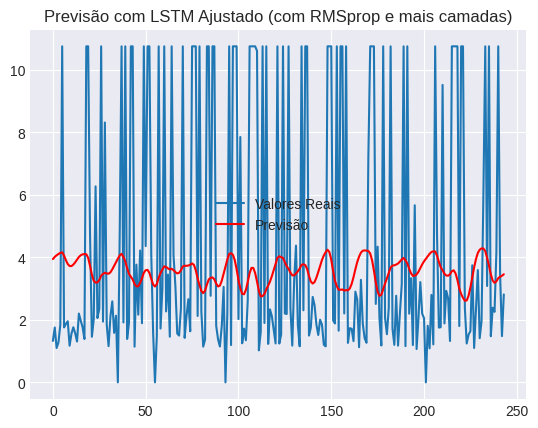

In [40]:
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.metrics import mean_squared_error

# Normalizar os dados
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df_capeado[['tempo_minutos']])

# Função para criar as features com base em lags (sequências temporais)
def create_lstm_features(data, lags=20):
    X, y = [], []
    for i in range(lags, len(data)):
        X.append(data[i-lags:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

# Criar features para LSTM com 20 lags
X, y = create_lstm_features(scaled_data, lags=20)

# Dividir em treino e teste (80% treino, 20% teste)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape para formato [amostras, lags, features] para o LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Construir o modelo LSTM
model = Sequential()

# Primeira camada LSTM com Dropout
model.add(LSTM(units=150, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))  # 20% de Dropout para regularização

# Segunda camada LSTM com Dropout
model.add(LSTM(units=150, return_sequences=True))
model.add(Dropout(0.2))  # Outro Dropout para evitar overfitting

# Terceira camada LSTM (adicional) com menos unidades
model.add(LSTM(units=50))
model.add(Dropout(0.2))  # Dropout adicional

# Camada densa final para prever o próximo valor
model.add(Dense(units=1))

# Compilar o modelo com otimizador RMSprop e função de perda 'mean_squared_error'
model.compile(optimizer='rmsprop', loss='mean_squared_error')

# Treinar o modelo com 100 epochs e batch_size 32
model.fit(X_train, y_train, epochs=100, batch_size=32)

# Fazer previsões
y_pred = model.predict(X_test)

# Desnormalizar os dados para comparar com os valores reais
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform([y_test])

# Calcular RMSE
rmse = np.sqrt(mean_squared_error(y_test[0], y_pred[:, 0]))
print(f"RMSE LSTM ajustado: {rmse}")

# Plotar as previsões vs valores reais
import matplotlib.pyplot as plt
plt.plot(y_test[0], label='Valores Reais')
plt.plot(y_pred[:, 0], label='Previsão', color='red')
plt.legend()
plt.title('Previsão com LSTM Ajustado (com RMSprop e mais camadas)')
plt.show()


In [41]:
# Calcular a média dos valores reais de 'tempo_minutos'
media_tempo_minutos = df_capeado['tempo_minutos'].mean()
print(f"Média dos valores reais de 'tempo_minutos': {media_tempo_minutos:.4f}")

# Calcular a relação entre o RMSE e a média
relacao_rmse_media = (3.9829735358104204 / media_tempo_minutos) * 100
print(f"RMSE é {relacao_rmse_media:.2f}% da média dos valores reais.")


Média dos valores reais de 'tempo_minutos': 4.0602
RMSE é 98.10% da média dos valores reais.


Epoch 1/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - loss: 0.1645
Epoch 2/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 0.1261
Epoch 3/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - loss: 0.1256
Epoch 4/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 0.1266
Epoch 5/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 0.1207
Epoch 6/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 0.1190
Epoch 7/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - loss: 0.1174
Epoch 8/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 0.1255
Epoch 9/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - loss: 0.1182
Epoch 10/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - loss: 0.1264
Epoch 11/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - loss: 0.1137
Epoch 12/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 0.1164
Epoch 13/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 0.1111
Epoch 14/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 0.1174
Epoch 15/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - lo

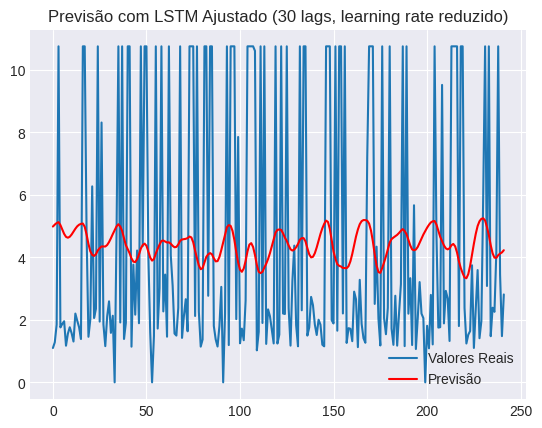

In [42]:
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.optimizers import RMSprop
from sklearn.metrics import mean_squared_error

# Normalizar os dados
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df_capeado[['tempo_minutos']])

# Função para criar as features com base em lags (sequências temporais)
def create_lstm_features(data, lags=30):  # Aumentamos os lags para 30
    X, y = [], []
    for i in range(lags, len(data)):
        X.append(data[i-lags:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

# Criar features para LSTM com 30 lags
X, y = create_lstm_features(scaled_data, lags=30)

# Dividir em treino e teste (80% treino, 20% teste)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape para formato [amostras, lags, features] para o LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Construir o modelo LSTM
model = Sequential()

# Primeira camada LSTM com Dropout
model.add(LSTM(units=200, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))  # 20% de Dropout para regularização

# Segunda camada LSTM com Dropout
model.add(LSTM(units=150, return_sequences=True))
model.add(Dropout(0.2))  # Outro Dropout para evitar overfitting

# Terceira camada LSTM com menos unidades
model.add(LSTM(units=50))
model.add(Dropout(0.2))  # Dropout adicional

# Camada densa final para prever o próximo valor
model.add(Dense(units=1))

# Compilar o modelo com um learning rate menor e RMSprop
optimizer = RMSprop(learning_rate=0.001)  # Learning rate reduzido
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Treinar o modelo com 100 epochs e batch_size 32
model.fit(X_train, y_train, epochs=100, batch_size=32)

# Fazer previsões
y_pred = model.predict(X_test)

# Desnormalizar os dados para comparar com os valores reais
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform([y_test])

# Calcular RMSE
rmse = np.sqrt(mean_squared_error(y_test[0], y_pred[:, 0]))
print(f"RMSE LSTM com ajustes: {rmse}")

# Plotar as previsões vs valores reais
import matplotlib.pyplot as plt
plt.plot(y_test[0], label='Valores Reais')
plt.plot(y_pred[:, 0], label='Previsão', color='red')
plt.legend()
plt.title('Previsão com LSTM Ajustado (30 lags, learning rate reduzido)')
plt.show()


Epoch 1/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.1390
Epoch 2/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1153
Epoch 3/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1240
Epoch 4/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1286
Epoch 5/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1184
Epoch 6/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1203
Epoch 7/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1211
Epoch 8/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1237
Epoch 9/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1236
Epoch 10/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1206
Epoch 11/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1242
Epoch 12/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1218
Epoch 13/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1128
Epoch 14/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1313
Epoch 15/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - lo

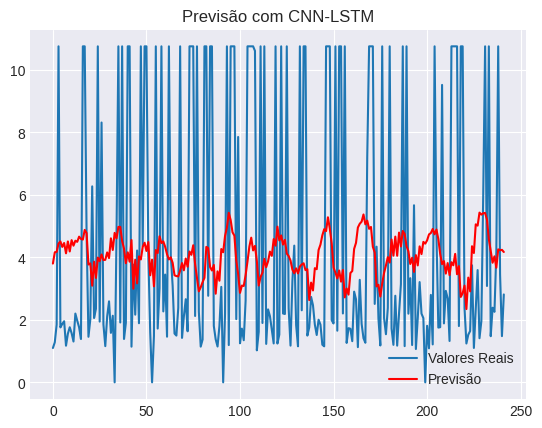

In [43]:
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Conv1D, MaxPooling1D
from tensorflow.keras.optimizers import RMSprop
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Normalizar os dados
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df_capeado[['tempo_minutos']])

# Função para criar as features com base em lags (sequências temporais)
def create_cnn_lstm_features(data, lags=30):
    X, y = [], []
    for i in range(lags, len(data)):
        X.append(data[i-lags:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

# Criar features para CNN-LSTM com 30 lags
X, y = create_cnn_lstm_features(scaled_data, lags=30)

# Dividir em treino e teste (80% treino, 20% teste)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape para formato [amostras, lags, features] para o CNN-LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Construir o modelo CNN-LSTM
model = Sequential()

# Camada CNN: 32 filtros, tamanho do kernel 3, ativação ReLU
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))

# MaxPooling para reduzir a dimensionalidade
model.add(MaxPooling1D(pool_size=2))

# Camada LSTM com Dropout
model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))

# Outra camada LSTM com Dropout
model.add(LSTM(units=50))
model.add(Dropout(0.2))

# Camada densa final para prever o próximo valor
model.add(Dense(units=1))

# Compilar o modelo com otimizador RMSprop
optimizer = RMSprop(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Treinar o modelo com 100 epochs e batch_size 32
model.fit(X_train, y_train, epochs=100, batch_size=32)

# Fazer previsões
y_pred = model.predict(X_test)

# Desnormalizar os dados para comparar com os valores reais
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform([y_test])

# Calcular RMSE
rmse = np.sqrt(mean_squared_error(y_test[0], y_pred[:, 0]))

# Calcular MAE
mae = mean_absolute_error(y_test[0], y_pred[:, 0])

# Calcular R²
r2 = r2_score(y_test[0], y_pred[:, 0])

# Calcular MAPE
mape = np.mean(np.abs((y_test[0] - y_pred[:, 0]) / y_test[0])) * 100

# Exibir todas as métricas
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R²: {r2}")
print(f"MAPE: {mape}%")

# Plotar as previsões vs valores reais
import matplotlib.pyplot as plt
plt.plot(y_test[0], label='Valores Reais')
plt.plot(y_pred[:, 0], label='Previsão', color='red')
plt.legend()
plt.title('Previsão com CNN-LSTM')
plt.show()


In [44]:
# agora BI-LSTM

Epoch 1/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - loss: 0.1505
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - loss: 0.1251
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 0.1235
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 0.1257
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 0.1193
Epoch 6/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 0.1160
Epoch 7/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 0.1119
Epoch 8/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 0.1243
Epoch 9/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.1139
Epoch 10/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - loss: 0.1235
Epoch 11/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 0.1083
Epoch 12/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 0.1268
Epoch 13/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 0.1149
Epoch 14/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - loss: 0.1292
Epoch 15/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - lo

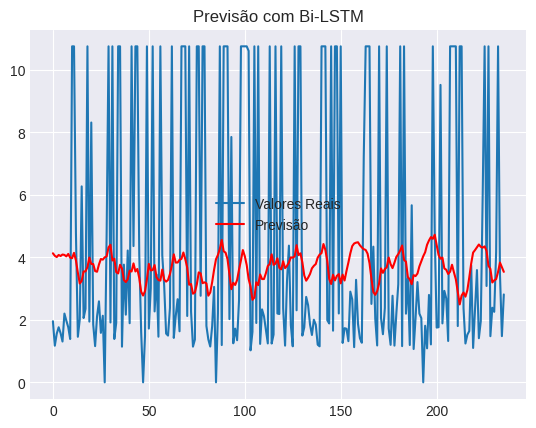

In [45]:
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Bidirectional
from tensorflow.keras.optimizers import RMSprop
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Normalizar os dados
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df_capeado[['tempo_minutos']])

# Função para criar as features com base em lags (sequências temporais)
def create_bilstm_features(data, lags=60):
    X, y = [], []
    for i in range(lags, len(data)):
        X.append(data[i-lags:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

# Criar features para Bi-LSTM com 30 lags
X, y = create_bilstm_features(scaled_data, lags=60)

# Dividir em treino e teste (80% treino, 20% teste)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape para formato [amostras, lags, features] para o Bi-LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Construir o modelo Bi-LSTM
model = Sequential()

# Camada Bidirecional LSTM com Dropout
model.add(Bidirectional(LSTM(units=100, return_sequences=True), input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

# Outra camada Bidirecional LSTM com Dropout
model.add(Bidirectional(LSTM(units=50)))
model.add(Dropout(0.2))

# Camada densa final para prever o próximo valor
model.add(Dense(units=1))

# Compilar o modelo com otimizador RMSprop
optimizer = RMSprop(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Treinar o modelo com 100 epochs e batch_size 32
model.fit(X_train, y_train, epochs=100, batch_size=32)

# Fazer previsões
y_pred = model.predict(X_test)

# Desnormalizar os dados para comparar com os valores reais
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform([y_test])

# Calcular RMSE
rmse = np.sqrt(mean_squared_error(y_test[0], y_pred[:, 0]))

# Calcular MAE
mae = mean_absolute_error(y_test[0], y_pred[:, 0])

# Calcular R²
r2 = r2_score(y_test[0], y_pred[:, 0])

# Exibir todas as métricas
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R²: {r2}")

# Plotar as previsões vs valores reais
import matplotlib.pyplot as plt
plt.plot(y_test[0], label='Valores Reais')
plt.plot(y_pred[:, 0], label='Previsão', color='red')
plt.legend()
plt.title('Previsão com Bi-LSTM')
plt.show()


In [46]:
# abaixo lag 120 e 50 epochs

Epoch 1/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 7s 117ms/step - loss: 0.1343
Epoch 2/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - loss: 0.1331
Epoch 3/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - loss: 0.1253
Epoch 4/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 111ms/step - loss: 0.1244
Epoch 5/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 111ms/step - loss: 0.1230
Epoch 6/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 118ms/step - loss: 0.1180
Epoch 7/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 119ms/step - loss: 0.1198
Epoch 8/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 124ms/step - loss: 0.1176
Epoch 9/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 116ms/step - loss: 0.1275
Epoch 10/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 118ms/step - loss: 0.1210
Epoch 11/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 124ms/step - loss: 0.1079
Epoch 12/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 115ms/step - loss: 0.1233
Epoch 13/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 116ms/step - loss: 0.1141
Epoch 14/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 113ms/step - loss: 0.1285
Epoch 15/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 113ms/step - lo

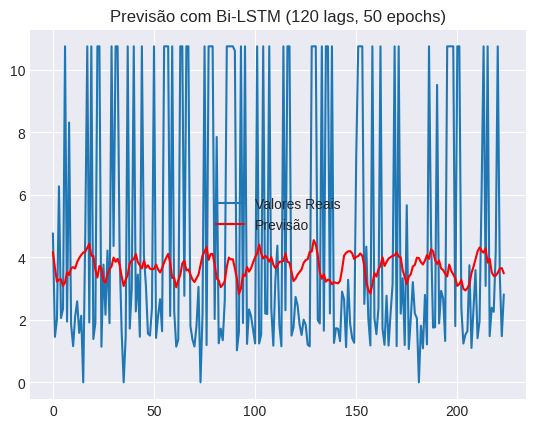

In [47]:
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Bidirectional
from tensorflow.keras.optimizers import RMSprop
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Normalizar os dados
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df_capeado[['tempo_minutos']])

# Função para criar as features com base em lags (sequências temporais)
def create_bilstm_features(data, lags=120):  # Aumentamos para 120 lags
    X, y = [], []
    for i in range(lags, len(data)):
        X.append(data[i-lags:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

# Criar features para Bi-LSTM com 120 lags
X, y = create_bilstm_features(scaled_data, lags=120)

# Dividir em treino e teste (80% treino, 20% teste)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape para formato [amostras, lags, features] para o Bi-LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Construir o modelo Bi-LSTM
model = Sequential()

# Camada Bidirecional LSTM com Dropout
model.add(Bidirectional(LSTM(units=100, return_sequences=True), input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

# Outra camada Bidirecional LSTM com Dropout
model.add(Bidirectional(LSTM(units=50)))
model.add(Dropout(0.2))

# Camada densa final para prever o próximo valor
model.add(Dense(units=1))

# Compilar o modelo com otimizador RMSprop
optimizer = RMSprop(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Treinar o modelo com 50 epochs (ajustado) e batch_size 32
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Fazer previsões
y_pred = model.predict(X_test)

# Desnormalizar os dados para comparar com os valores reais
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform([y_test])

# Calcular RMSE
rmse = np.sqrt(mean_squared_error(y_test[0], y_pred[:, 0]))

# Calcular MAE
mae = mean_absolute_error(y_test[0], y_pred[:, 0])

# Calcular R²
r2 = r2_score(y_test[0], y_pred[:, 0])

# Exibir todas as métricas
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R²: {r2}")

# Plotar as previsões vs valores reais
import matplotlib.pyplot as plt
plt.plot(y_test[0], label='Valores Reais')
plt.plot(y_pred[:, 0], label='Previsão', color='red')
plt.legend()
plt.title('Previsão com Bi-LSTM (120 lags, 50 epochs)')
plt.show()


In [48]:
# agora em diante irei usar CNN - profundas

Epoch 1/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1763
Epoch 2/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1355
Epoch 3/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1094
Epoch 4/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1190
Epoch 5/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1229
Epoch 6/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1235
Epoch 7/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1065
Epoch 8/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1106
Epoch 9/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1017
Epoch 10/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1059
Epoch 11/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1049
Epoch 12/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0866
Epoch 13/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0880
Epoch 14/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0835
Epoch 15/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0835
Epoch 16/50
28/28 ━

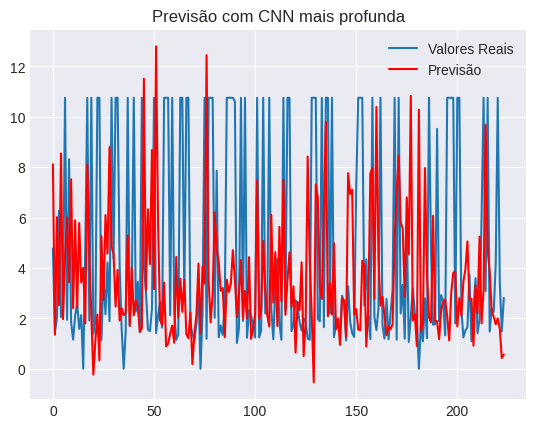

In [49]:
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.optimizers import RMSprop
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Normalizar os dados
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df_capeado[['tempo_minutos']])

# Função para criar as features com base em lags (sequências temporais)
def create_cnn_features(data, lags=120):
    X, y = [], []
    for i in range(lags, len(data)):
        X.append(data[i-lags:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

# Criar features para CNN com 120 lags
X, y = create_cnn_features(scaled_data, lags=120)

# Dividir em treino e teste (80% treino, 20% teste)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape para formato [amostras, lags, features] para a CNN
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Construir o modelo CNN mais profunda
model = Sequential()

# Primeira camada CNN: 64 filtros, kernel size 3, ativação ReLU
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))

# Segunda camada CNN: 128 filtros, kernel size 3, ativação ReLU
model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))

# Terceira camada CNN: 64 filtros, kernel size 3, ativação ReLU
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))

# Flatten a saída para passar para a camada densa
model.add(Flatten())

# Camada densa com Dropout
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.2))

# Camada densa final para prever o próximo valor
model.add(Dense(units=1))

# Compilar o modelo com otimizador RMSprop
optimizer = RMSprop(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Treinar o modelo com 50 epochs e batch_size 32
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Fazer previsões
y_pred = model.predict(X_test)

# Desnormalizar os dados para comparar com os valores reais
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform([y_test])

# Calcular RMSE
rmse = np.sqrt(mean_squared_error(y_test[0], y_pred[:, 0]))

# Calcular MAE
mae = mean_absolute_error(y_test[0], y_pred[:, 0])

# Calcular R²
r2 = r2_score(y_test[0], y_pred[:, 0])

# Exibir todas as métricas
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R²: {r2}")

# Plotar as previsões vs valores reais
import matplotlib.pyplot as plt
plt.plot(y_test[0], label='Valores Reais')
plt.plot(y_pred[:, 0], label='Previsão', color='red')
plt.legend()
plt.title('Previsão com CNN mais profunda')
plt.show()


In [50]:
# a seguir vou usar O RAMDOM FOREST

RMSE: 3.72880882913081
MAE: 3.298288047345681
R²: -0.07516319165900676


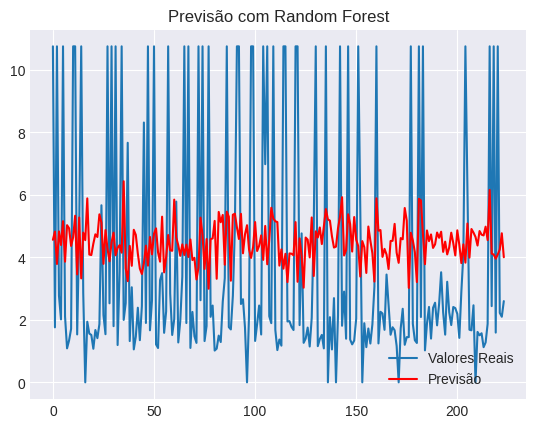

In [51]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Normalizar os dados
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df_capeado[['tempo_minutos']])

# Função para criar as features com base em lags (sequências temporais)
def create_rf_features(data, lags=120):
    X, y = [], []
    for i in range(lags, len(data)):
        X.append(data[i-lags:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

# Criar features para Random Forest com 120 lags
X, y = create_rf_features(scaled_data, lags=120)

# Dividir em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar e treinar o modelo Random Forest
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

# Fazer previsões
y_pred = model_rf.predict(X_test)

# Desnormalizar os dados para comparar com os valores reais
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1)).flatten()
y_test = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

# Calcular RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calcular MAE
mae = mean_absolute_error(y_test, y_pred)

# Calcular R²
r2 = r2_score(y_test, y_pred)

# Exibir todas as métricas
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R²: {r2}")

# Plotar as previsões vs valores reais
import matplotlib.pyplot as plt
plt.plot(y_test, label='Valores Reais')
plt.plot(y_pred, label='Previsão', color='red')
plt.legend()
plt.title('Previsão com Random Forest')
plt.show()


RMSE: 3.709145545495813
MAE: 3.2824464407542897
R²: -0.06385368384129664


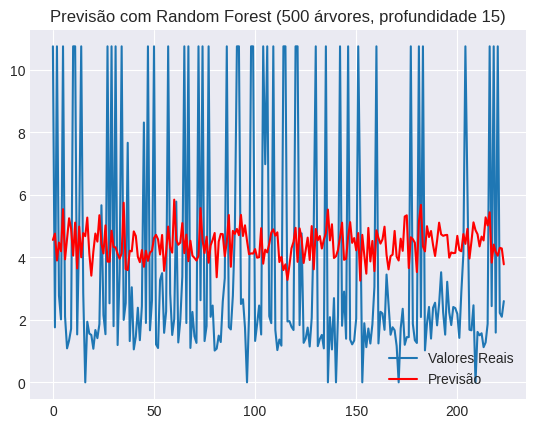

In [52]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Normalizar os dados
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df_capeado[['tempo_minutos']])

# Função para criar as features com base em lags (sequências temporais)
def create_rf_features(data, lags=120):
    X, y = [], []
    for i in range(lags, len(data)):
        X.append(data[i-lags:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

# Criar features para Random Forest com 120 lags
X, y = create_rf_features(scaled_data, lags=120)

# Dividir em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar e treinar o modelo Random Forest ajustado
model_rf = RandomForestRegressor(n_estimators=500, max_depth=15, random_state=42)  # Aumentamos o n_estimators e ajustamos max_depth
model_rf.fit(X_train, y_train)

# Fazer previsões
y_pred = model_rf.predict(X_test)

# Desnormalizar os dados para comparar com os valores reais
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1)).flatten()
y_test = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

# Calcular RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calcular MAE
mae = mean_absolute_error(y_test, y_pred)

# Calcular R²
r2 = r2_score(y_test, y_pred)

# Exibir todas as métricas
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R²: {r2}")

# Plotar as previsões vs valores reais
import matplotlib.pyplot as plt
plt.plot(y_test, label='Valores Reais')
plt.plot(y_pred, label='Previsão', color='red')
plt.legend()
plt.title('Previsão com Random Forest (500 árvores, profundidade 15)')
plt.show()


In [53]:
# ABAIXO COM 1000 ARVORES

RMSE: 3.67157877621833
MAE: 3.0953633375638896
R²: -0.029645363378149492


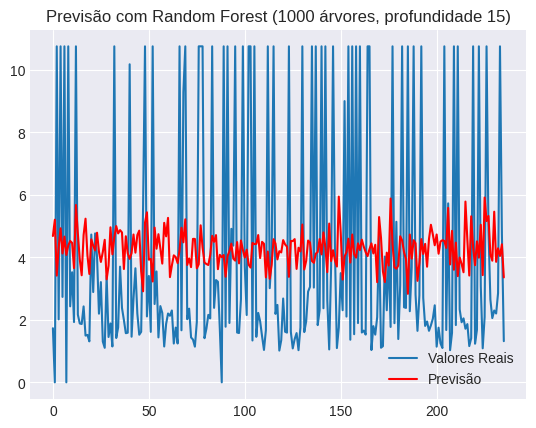

In [54]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Normalizar os dados
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df_capeado[['tempo_minutos']])

# Função para criar as features com base em lags (sequências temporais)
def create_rf_features(data, lags=120):
    X, y = [], []
    for i in range(lags, len(data)):
        X.append(data[i-lags:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

# Criar features para Random Forest com 60 lags
X, y = create_rf_features(scaled_data, lags=60)

# Dividir em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar e treinar o modelo Random Forest ajustado
model_rf = RandomForestRegressor(n_estimators=1000, max_depth=15, random_state=42)  # Aumentamos o n_estimators e ajustamos max_depth
model_rf.fit(X_train, y_train)

# Fazer previsões
y_pred = model_rf.predict(X_test)

# Desnormalizar os dados para comparar com os valores reais
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1)).flatten()
y_test = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

# Calcular RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calcular MAE
mae = mean_absolute_error(y_test, y_pred)

# Calcular R²
r2 = r2_score(y_test, y_pred)

# Exibir todas as métricas
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R²: {r2}")

# Plotar as previsões vs valores reais
import matplotlib.pyplot as plt
plt.plot(y_test, label='Valores Reais')
plt.plot(y_pred, label='Previsão', color='red')
plt.legend()
plt.title('Previsão com Random Forest (1000 árvores, profundidade 15)')
plt.show()


In [55]:
# ABAIXO VOU DIMINUIR AS LAGS E AUMENTAR AS ARVORES

In [56]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Normalizar os dados
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df_capeado[['tempo_minutos']])

# Função para criar as features com base em lags (sequências temporais)
def create_rf_features(data, lags=120):
    X, y = [], []
    for i in range(lags, len(data)):
        X.append(data[i-lags:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

# Criar features para Random Forest com 60 lags
X, y = create_rf_features(scaled_data, lags=60)

# Dividir em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar e treinar o modelo Random Forest ajustado
model_rf = RandomForestRegressor(n_estimators=4000, max_depth=17, random_state=42)  # Aumentamos o n_estimators e ajustamos max_depth
model_rf.fit(X_train, y_train)

# Fazer previsões
y_pred = model_rf.predict(X_test)

# Desnormalizar os dados para comparar com os valores reais
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1)).flatten()
y_test = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

# Calcular RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calcular MAE
mae = mean_absolute_error(y_test, y_pred)

# Calcular R²
r2 = r2_score(y_test, y_pred)

# Exibir todas as métricas
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R²: {r2}")

# Plotar as previsões vs valores reais
import matplotlib.pyplot as plt
plt.plot(y_test, label='Valores Reais')
plt.plot(y_pred, label='Previsão', color='red')
plt.legend()
plt.title('Previsão com Random Forest (1000 árvores, profundidade 15)')
plt.show()


KeyboardInterrupt: 

In [ ]:
# AGORA COM AJUSTES DE HIPER PARAMETROS

In [ ]:

import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Normalizar os dados
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df_capeado[['tempo_minutos']])

# Função para criar as features com base em lags (sequências temporais)
def create_rf_features(data, lags=120):
    X, y = [], []
    for i in range(lags, len(data)):
        X.append(data[i-lags:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

# Criar features para Random Forest com 120 lags
X, y = create_rf_features(scaled_data, lags=60)

# Dividir em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar e treinar o modelo Random Forest ajustado com min_samples_split e min_samples_leaf
model_rf = RandomForestRegressor(
    n_estimators=3000, 
    max_depth=17, 
    min_samples_split=10,  # Número mínimo de amostras para dividir um nó
    min_samples_leaf=4,    # Número mínimo de amostras em cada folha
    random_state=42
)
model_rf.fit(X_train, y_train)

# Fazer previsões
y_pred = model_rf.predict(X_test)

# Desnormalizar os dados para comparar com os valores reais
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1)).flatten()
y_test = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

# Calcular RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calcular MAE
mae = mean_absolute_error(y_test, y_pred)

# Calcular R²
r2 = r2_score(y_test, y_pred)

# Exibir todas as métricas
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R²: {r2}")

# Plotar as previsões vs valores reais
import matplotlib.pyplot as plt
plt.plot(y_test, label='Valores Reais')
plt.plot(y_pred, label='Previsão', color='red')
plt.legend()
plt.title('Previsão com Random Forest (ajustes nos parâmetros min_samples_split e min_samples_leaf)')
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb

# Normalizar os dados
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df_capeado[['tempo_minutos']])

# Função para criar as features com base em lags (sequências temporais)
def create_xgb_features(data, lags=60):  # Mantemos 60 lags
    X, y = [], []
    for i in range(lags, len(data)):
        X.append(data[i-lags:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

# Criar features para XGBoost
X, y = create_xgb_features(scaled_data, lags=60)

# Dividir em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir o modelo XGBoost
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Definir os hiperparâmetros para testar no GridSearch (reduzido)
param_grid = {
    'n_estimators': [200, 500],  # Reduzido o número de árvores
    'learning_rate': [0.01, 0.1],  # Foco em learning rates comuns
    'max_depth': [3, 6],  # Mantido mais básico
    'subsample': [0.8],  # Subsample fixo para reduzir a carga
    'colsample_bytree': [0.8]
}

# Configurar o GridSearch com apenas 2 núcleos (para não sobrecarregar a CPU)
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, 
                           cv=3, n_jobs=2, verbose=2, scoring='neg_mean_squared_error')

# Treinar o modelo com GridSearch
grid_search.fit(X_train, y_train)

# Exibir os melhores hiperparâmetros
print(f"Melhores hiperparâmetros: {grid_search.best_params_}")

# Fazer previsões com o melhor modelo
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Desnormalizar os dados para comparar com os valores reais
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1)).flatten()
y_test = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

# Calcular RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calcular MAE
mae = mean_absolute_error(y_test, y_pred)

# Calcular R²
r2 = r2_score(y_test, y_pred)

# Exibir todas as métricas
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R²: {r2}")

# Plotar as previsões vs valores reais
import matplotlib.pyplot as plt
plt.plot(y_test, label='Valores Reais')
plt.plot(y_pred, label='Previsão', color='red')
plt.legend()
plt.title('Previsão com XGBoost (GridSearch Ajustado)')
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb

# Normalizar os dados
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df_capeado[['tempo_minutos']])

# Função para criar as features com base em lags (sequências temporais)
def create_xgb_features(data, lags=60):  # Mantemos 60 lags
    X, y = [], []
    for i in range(lags, len(data)):
        X.append(data[i-lags:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

# Criar features para XGBoost
X, y = create_xgb_features(scaled_data, lags=60)

# Dividir em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir o modelo XGBoost
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Definir os hiperparâmetros para testar no GridSearch (reduzido)
param_grid = {
    'n_estimators': [300, 600],  # Reduzido o número de árvores
    'learning_rate': [0.01, 0.1],  # Foco em learning rates comuns
    'max_depth': [3, 6],  # Mantido mais básico
    'subsample': [0.8],  # Subsample fixo para reduzir a carga
    'colsample_bytree': [0.8]
}

# Configurar o GridSearch com apenas 2 núcleos (para não sobrecarregar a CPU)
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, 
                           cv=3, n_jobs=2, verbose=2, scoring='neg_mean_squared_error')

# Treinar o modelo com GridSearch
grid_search.fit(X_train, y_train)

# Exibir os melhores hiperparâmetros
print(f"Melhores hiperparâmetros: {grid_search.best_params_}")

# Fazer previsões com o melhor modelo
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Desnormalizar os dados para comparar com os valores reais
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1)).flatten()
y_test = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

# Calcular RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calcular MAE
mae = mean_absolute_error(y_test, y_pred)

# Calcular R²
r2 = r2_score(y_test, y_pred)

# Exibir todas as métricas
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R²: {r2}")

# Plotar as previsões vs valores reais
import matplotlib.pyplot as plt
plt.plot(y_test, label='Valores Reais')
plt.plot(y_pred, label='Previsão', color='red')
plt.legend()
plt.title('Previsão com XGBoost (GridSearch Ajustado)')
plt.show()


In [ ]:
# ABAIXO XGBOOST COM MAIS AJUSTES FINOS

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb

# Normalizar os dados
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df_capeado[['tempo_minutos']])

# Função para criar as features com base em lags (sequências temporais)
def create_xgb_features(data, lags=60):  # Mantemos 60 lags por enquanto
    X, y = [], []
    for i in range(lags, len(data)):
        X.append(data[i-lags:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

# Criar features para XGBoost com 60 lags
X, y = create_xgb_features(scaled_data, lags=60)

# Dividir em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir o modelo XGBoost
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Definir os hiperparâmetros para testar no GridSearch (ajustes de learning_rate e max_depth)
param_grid = {
    'n_estimators': [200],  # Mantido em 200
    'learning_rate': [0.005, 0.001],  # Testando valores menores de learning_rate
    'max_depth': [4, 5],  # Aumentando a profundidade
    'subsample': [0.8],
    'colsample_bytree': [0.8]
}

# Configurar o GridSearch com 3 folds e limitar o uso da CPU para 2 núcleos
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, 
                           cv=3, n_jobs=2, verbose=2, scoring='neg_mean_squared_error')

# Treinar o modelo com GridSearch
grid_search.fit(X_train, y_train)

# Exibir os melhores hiperparâmetros
print(f"Melhores hiperparâmetros: {grid_search.best_params_}")

# Fazer previsões com o melhor modelo
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Desnormalizar os dados para comparar com os valores reais
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1)).flatten()
y_test = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

# Calcular RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calcular MAE
mae = mean_absolute_error(y_test, y_pred)

# Calcular R²
r2 = r2_score(y_test, y_pred)

# Exibir todas as métricas
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R²: {r2}")

# Plotar as previsões vs valores reais
import matplotlib.pyplot as plt
plt.plot(y_test, label='Valores Reais')
plt.plot(y_pred, label='Previsão', color='red')
plt.legend()
plt.title('Previsão com XGBoost (GridSearch Ajustado)')
plt.show()


In [ ]:
# MAIS AJUSTES FINOS

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb

# Normalizar os dados
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df_capeado[['tempo_minutos']])

# Função para criar as features com base em lags (sequências temporais)
def create_xgb_features(data, lags=60):
    X, y = [], []
    for i in range(lags, len(data)):
        X.append(data[i-lags:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

# Criar features para XGBoost com 60 lags
X, y = create_xgb_features(scaled_data, lags=60)

# Dividir em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir o modelo XGBoost
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Definir os hiperparâmetros para testar no GridSearch (ajustando learning_rate para valores intermediários)
param_grid = {
    'n_estimators': [200],
    'learning_rate': [0.002, 0.005],  # Valores intermediários
    'max_depth': [4],
    'subsample': [0.8],
    'colsample_bytree': [0.8]
}

# Configurar o GridSearch
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, 
                           cv=3, n_jobs=2, verbose=2, scoring='neg_mean_squared_error')

# Treinar o modelo com GridSearch
grid_search.fit(X_train, y_train)

# Exibir os melhores hiperparâmetros
print(f"Melhores hiperparâmetros: {grid_search.best_params_}")

# Fazer previsões com o melhor modelo
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Desnormalizar os dados para comparar com os valores reais
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1)).flatten()
y_test = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

# Calcular RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calcular MAE
mae = mean_absolute_error(y_test, y_pred)

# Calcular R²
r2 = r2_score(y_test, y_pred)

# Exibir todas as métricas
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R²: {r2}")

# Plotar as previsões vs valores reais
import matplotlib.pyplot as plt
plt.plot(y_test, label='Valores Reais')
plt.plot(y_pred, label='Previsão', color='red')
plt.legend()
plt.title('Previsão com XGBoost (Ajuste de learning_rate)')
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb

# Normalizar os dados
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df_capeado[['tempo_minutos']])

# Função para criar as features com base em lags (sequências temporais)
def create_xgb_features(data, lags=60):
    X, y = [], []
    for i in range(lags, len(data)):
        X.append(data[i-lags:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

# Criar features para XGBoost com 60 lags
X, y = create_xgb_features(scaled_data, lags=60)

# Dividir em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir o modelo XGBoost
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Definir os hiperparâmetros para testar no GridSearch (ajustando min_child_weight e gamma)
param_grid = {
    'n_estimators': [200],
    'learning_rate': [0.001],
    'max_depth': [4],
    'subsample': [0.8],
    'colsample_bytree': [0.8],
    'min_child_weight': [1, 3],  # Ajustando min_child_weight
    'gamma': [0, 0.1, 0.5]  # Ajustando gamma
}

# Configurar o GridSearch
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, 
                           cv=3, n_jobs=2, verbose=2, scoring='neg_mean_squared_error')

# Treinar o modelo com GridSearch
grid_search.fit(X_train, y_train)

# Exibir os melhores hiperparâmetros
print(f"Melhores hiperparâmetros: {grid_search.best_params_}")

# Fazer previsões com o melhor modelo
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Desnormalizar os dados para comparar com os valores reais
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1)).flatten()
y_test = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

# Calcular RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calcular MAE
mae = mean_absolute_error(y_test, y_pred)

# Calcular R²
r2 = r2_score(y_test, y_pred)

# Exibir todas as métricas
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R²: {r2}")

# Plotar as previsões vs valores reais
import matplotlib.pyplot as plt
plt.plot(y_test, label='Valores Reais')
plt.plot(y_pred, label='Previsão', color='red')
plt.legend()
plt.title('Previsão com XGBoost (Ajuste de min_child_weight e gamma)')
plt.show()


### ABAIXO O MELHOR RESULTADO ATÉ AGORA

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Melhores hiperparâmetros: {'colsample_bytree': 0.8, 'gamma': 0.5, 'learning_rate': 0.002, 'max_depth': 4, 'min_child_weight': 3, 'n_estimators': 200, 'subsample': 0.8}
RMSE: 3.6157319730306985
MAE: 2.988655380685658
R²: 0.0014394005920927988


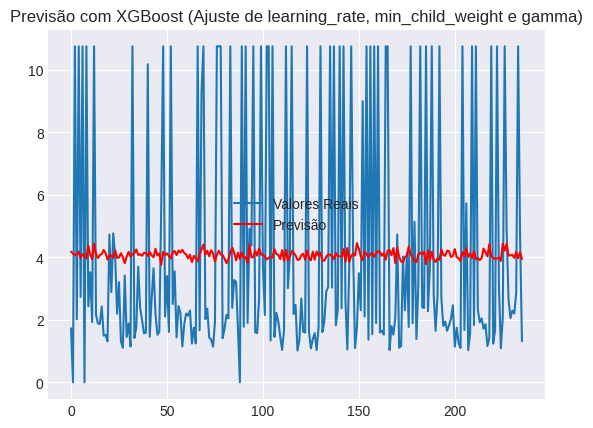

In [61]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb

# Normalizar os dados
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df_capeado[['tempo_minutos']])

# Função para criar as features com base em lags (sequências temporais)
def create_xgb_features(data, lags=60):
    X, y = [], []
    for i in range(lags, len(data)):
        X.append(data[i-lags:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

# Criar features para XGBoost com 60 lags
X, y = create_xgb_features(scaled_data, lags=60)

# Dividir em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir o modelo XGBoost
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Definir os hiperparâmetros para testar no GridSearch (combinando ambas as abordagens)
param_grid = {
    'n_estimators': [200],  # Mantido fixo em 200
    'learning_rate': [0.002, 0.005],  # Ajustando valores intermediários de learning_rate
    'max_depth': [4],  # Mantido em 4, já testado anteriormente
    'subsample': [0.8],
    'colsample_bytree': [0.8],
    'min_child_weight': [1, 3],  # Ajustando min_child_weight
    'gamma': [0, 0.1, 0.5]  # Ajustando gamma
}

# Configurar o GridSearch
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, 
                           cv=3, n_jobs=2, verbose=2, scoring='neg_mean_squared_error')

# Treinar o modelo com GridSearch
grid_search.fit(X_train, y_train)

# Exibir os melhores hiperparâmetros
print(f"Melhores hiperparâmetros: {grid_search.best_params_}")

# Fazer previsões com o melhor modelo
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Desnormalizar os dados para comparar com os valores reais
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1)).flatten()
y_test = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

# Calcular RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calcular MAE
mae = mean_absolute_error(y_test, y_pred)

# Calcular R²
r2 = r2_score(y_test, y_pred)

# Exibir todas as métricas
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R²: {r2}")

# Plotar as previsões vs valores reais
import matplotlib.pyplot as plt
plt.plot(y_test, label='Valores Reais')
plt.plot(y_pred, label='Previsão', color='red')
plt.legend()
plt.title('Previsão com XGBoost (Ajuste de learning_rate, min_child_weight e gamma)')
plt.show()


In [ ]:
# VAMOS AVALIAR ESSES RESULTADOS

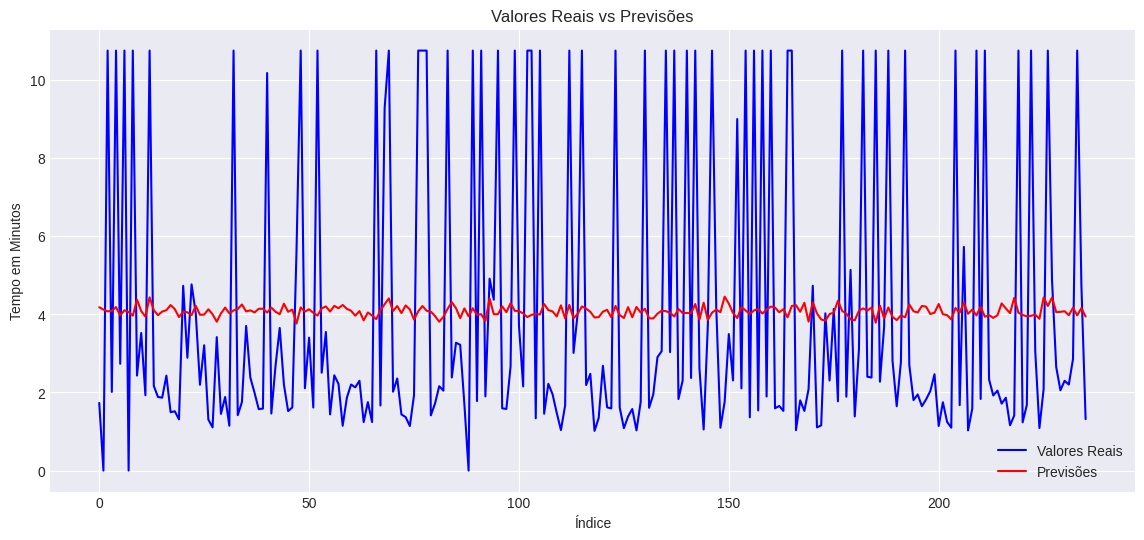

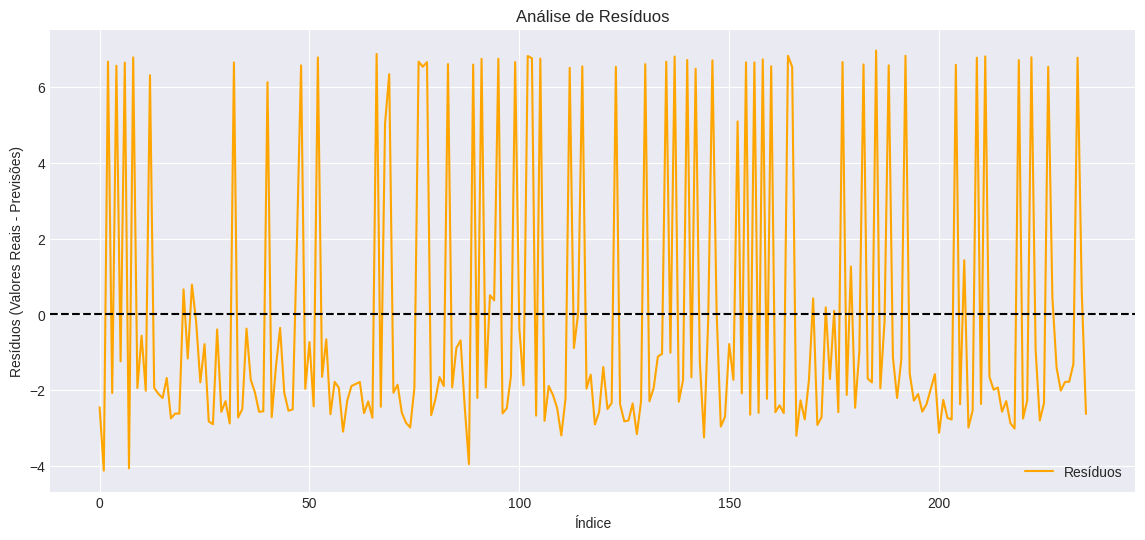

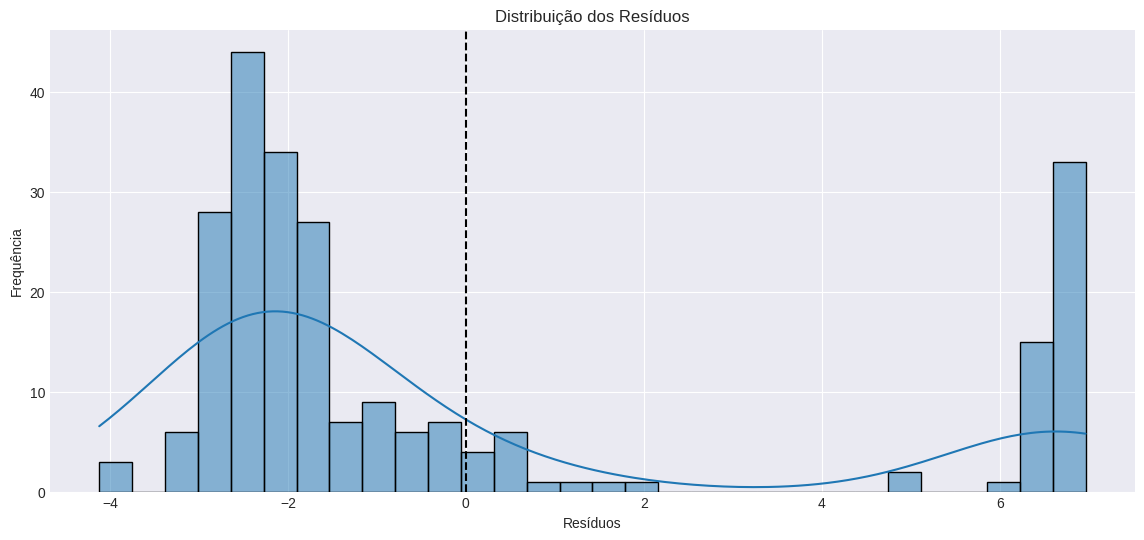

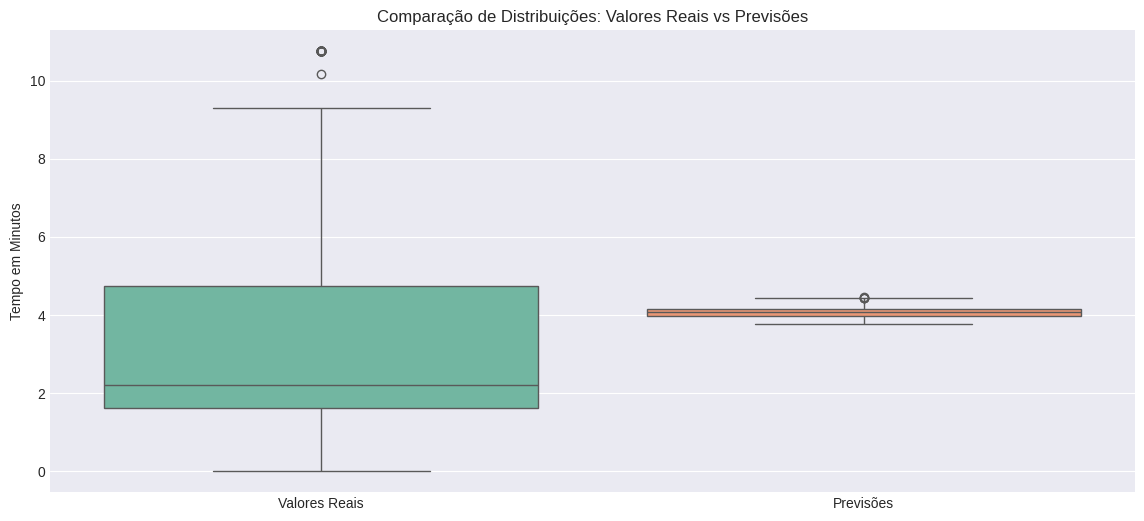

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular os resíduos
residuals = y_test - y_pred

# Plotar valores reais vs. previstos
plt.figure(figsize=(14, 6))
plt.plot(y_test, label='Valores Reais', color='blue')
plt.plot(y_pred, label='Previsões', color='red')
plt.title('Valores Reais vs Previsões')
plt.xlabel('Índice')
plt.ylabel('Tempo em Minutos')
plt.legend()
plt.show()

# Plotar os resíduos
plt.figure(figsize=(14, 6))
plt.plot(residuals, label='Resíduos', color='orange')
plt.axhline(0, color='black', linestyle='--')
plt.title('Análise de Resíduos')
plt.xlabel('Índice')
plt.ylabel('Resíduos (Valores Reais - Previsões)')
plt.legend()
plt.show()

# Histograma dos resíduos
plt.figure(figsize=(14, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.title('Distribuição dos Resíduos')
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.axvline(0, color='black', linestyle='--')
plt.show()

# Boxplot dos valores reais e previstos
plt.figure(figsize=(14, 6))
sns.boxplot(data=[y_test, y_pred], palette='Set2')
plt.xticks([0, 1], ['Valores Reais', 'Previsões'])
plt.title('Comparação de Distribuições: Valores Reais vs Previsões')
plt.ylabel('Tempo em Minutos')
plt.show()


In [65]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calcular os resíduos
residuals = y_test - y_pred

# Calcular as métricas
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Calcular o MAPE
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Exibir os resultados
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")
print(f"MAPE: {mape}%")


MAE: 2.988655380685658
RMSE: 3.6157319730306985
R²: 0.0014394005920927988
MAPE: inf%


In [ ]:
# QUERO ENTENDER A IMPORTÂNCIA DAS VARIÁVEIS COM A ALVO

   Feature  Importance (%)
26  Lag 27        3.375230
9   Lag 10        3.362402
16  Lag 17        3.273939
57  Lag 58        3.192296
58  Lag 59        3.070679
54  Lag 55        2.920798
50  Lag 51        2.907915
39  Lag 40        2.627500
56  Lag 57        2.551509
33  Lag 34        2.441472
5    Lag 6        2.420300
8    Lag 9        2.407288
45  Lag 46        2.296470
36  Lag 37        2.206445
47  Lag 48        2.148790
22  Lag 23        1.990535
52  Lag 53        1.990021
32  Lag 33        1.921366
13  Lag 14        1.904066
30  Lag 31        1.852374
55  Lag 56        1.771968
2    Lag 3        1.765192
14  Lag 15        1.622342
24  Lag 25        1.601821
44  Lag 45        1.574595
19  Lag 20        1.557068
21  Lag 22        1.546044
51  Lag 52        1.541283
31  Lag 32        1.533192
4    Lag 5        1.528456
18  Lag 19        1.485897
43  Lag 44        1.464875
46  Lag 47        1.463759
27  Lag 28        1.420317
25  Lag 26        1.404241
17  Lag 18        1.370407
5

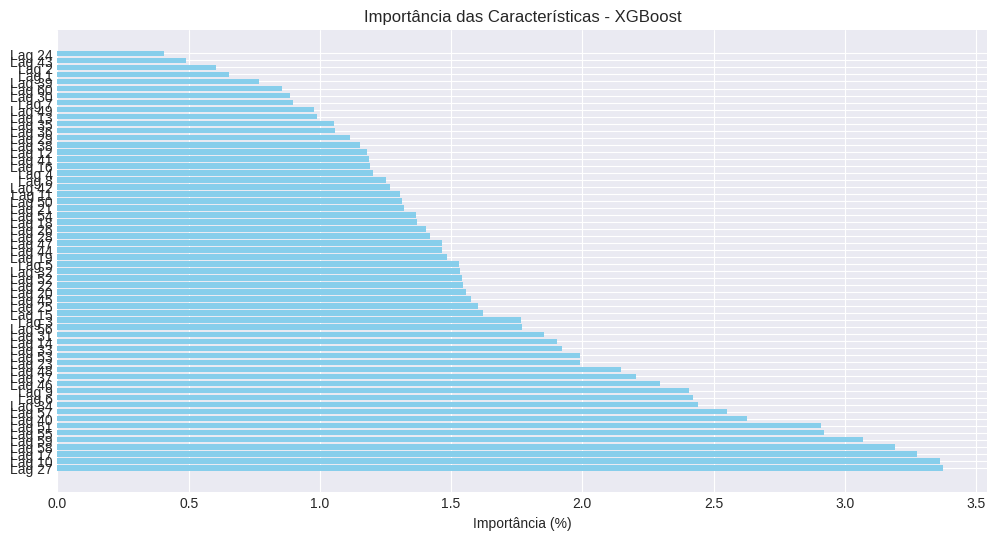

In [67]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Normalizar os dados
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df_capeado[['tempo_minutos']])

# Criar features para XGBoost (ajustando conforme necessário)
def create_xgb_features(data, lags=60):
    X, y = [], []
    for i in range(lags, len(data)):
        X.append(data[i-lags:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

# Criar features para XGBoost com 60 lags
X, y = create_xgb_features(scaled_data, lags=60)

# Dividir em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir o modelo XGBoost
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Treinar o modelo
xgb_model.fit(X_train, y_train)

# Obter a importância das características
importances = xgb_model.feature_importances_

# Converter as importâncias para porcentagem
importances_percentage = importances / np.sum(importances) * 100

# Criar um DataFrame para visualizar melhor
feature_importance_df = pd.DataFrame({
    'Feature': [f'Lag {i+1}' for i in range(X.shape[1])],
    'Importance (%)': importances_percentage
})

# Ordenar as importâncias
feature_importance_df = feature_importance_df.sort_values(by='Importance (%)', ascending=False)

# Exibir o resultado
print(feature_importance_df)

# Plotar a importância das características
plt.figure(figsize=(12, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance (%)'], color='skyblue')
plt.xlabel('Importância (%)')
plt.title('Importância das Características - XGBoost')
plt.show()


In [ ]:
# VOU EXECUTAR SUAVISAÇÃO NOS DADOS O QUE EU DEVERIA TER FEITO LA TRAS MAS É PARA FINS DE TESTE

In [69]:
# Suavizar os dados usando média móvel
window_size = 3  # Defina o tamanho da janela conforme necessário
df['tempo_movel_suavizado'] = df['tempo_minutos'].rolling(window=window_size).mean()

# Exibir as primeiras linhas para verificar
print(df[['tempo_minutos', 'tempo_movel_suavizado']].head())


   tempo_minutos  tempo_movel_suavizado
0       1.968342                    NaN
1       1.820760                    NaN
2       1.171667               1.653590
3       1.818634               1.603687
4       1.477203               1.489168


In [75]:
# Tratamento de valores nulos na coluna 'tempo_movel_suavizado'

# Opção 1: Remover as linhas com valores nulos
# df = df.dropna(subset=['tempo_movel_suavizado'])

# Opção 2: Substituir os valores nulos pela média da coluna
media = df['tempo_movel_suavizado'].mean()
df['tempo_movel_suavizado'].fillna(media, inplace=True)

# Opção 3: Interpolar os valores nulos
# df['tempo_movel_suavizado'].interpolate(method='linear', inplace=True)

# Opção 4: Substituir por zero
# df['tempo_movel_suavizado'].fillna(0, inplace=True)

# Verificar novamente se há valores nulos após o tratamento
num_nulos = df['tempo_movel_suavizado'].isnull().sum()
print(f"Número de valores nulos na coluna 'tempo_movel_suavizado' após o tratamento: {num_nulos}")


Número de valores nulos na coluna 'tempo_movel_suavizado' após o tratamento: 0


In [79]:
num_nulos = df['tempo_movel_suavizado'].isnull().sum()
print(f"Número de valores nulos na coluna 'tempo_movel_suavizado' após o tratamento: {num_nulos}")


Número de valores nulos na coluna 'tempo_movel_suavizado' após o tratamento: 0


# AGORA O MODELO COM OS DADOS SUAVIZADOS PARA FINS DE TESTE
## ABAIXO O MELHOR RESULTADO POIS O R2 É O COEFICIENTE DE PREVISÃO

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Melhores hiperparâmetros: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.005, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 0.8}
RMSE: 7.090895109332078
MAE: 5.640934333396495
R²: 0.43645559962289504


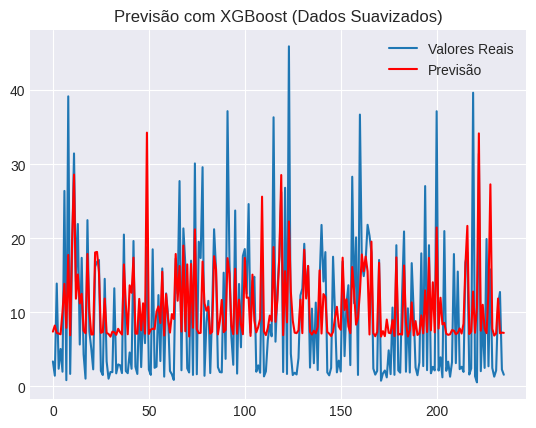

In [81]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb

# Normalizar os dados usando a coluna 'tempo_movel_suavizado'
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[['tempo_movel_suavizado']])

# Função para criar as features com base em lags (sequências temporais)
def create_xgb_features(data, lags=60):
    X, y = [], []
    for i in range(lags, len(data)):
        X.append(data[i-lags:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

# Criar features para XGBoost com 60 lags
X, y = create_xgb_features(scaled_data, lags=60)

# Dividir em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir o modelo XGBoost
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Definir os hiperparâmetros para testar no GridSearch
param_grid = {
    'n_estimators': [200],  # Mantido fixo em 200
    'learning_rate': [0.002, 0.005],  # Ajustando valores intermediários de learning_rate
    'max_depth': [4],  # Mantido em 4
    'subsample': [0.8],
    'colsample_bytree': [0.8],
    'min_child_weight': [1, 3],  # Ajustando min_child_weight
    'gamma': [0, 0.1, 0.5]  # Ajustando gamma
}

# Configurar o GridSearch
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, 
                           cv=3, n_jobs=2, verbose=2, scoring='neg_mean_squared_error')

# Treinar o modelo com GridSearch
grid_search.fit(X_train, y_train)

# Exibir os melhores hiperparâmetros
print(f"Melhores hiperparâmetros: {grid_search.best_params_}")

# Fazer previsões com o melhor modelo
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Desnormalizar os dados para comparar com os valores reais
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1)).flatten()
y_test = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

# Calcular RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calcular MAE
mae = mean_absolute_error(y_test, y_pred)

# Calcular R²
r2 = r2_score(y_test, y_pred)

# Exibir todas as métricas
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R²: {r2}")

# Plotar as previsões vs valores reais
import matplotlib.pyplot as plt
plt.plot(y_test, label='Valores Reais')
plt.plot(y_pred, label='Previsão', color='red')
plt.legend()
plt.title('Previsão com XGBoost (Dados Suavizados)')
plt.show()


# ESTOU VOLTANDO A ANALISE EXPLORATORIA POIS NAO TIVE BONS RESULTADOS COM OS ALGORITIMOS QUE USEI ATE AGORA POIS FALHEI NA ANALISE EXPLORATÓRIA

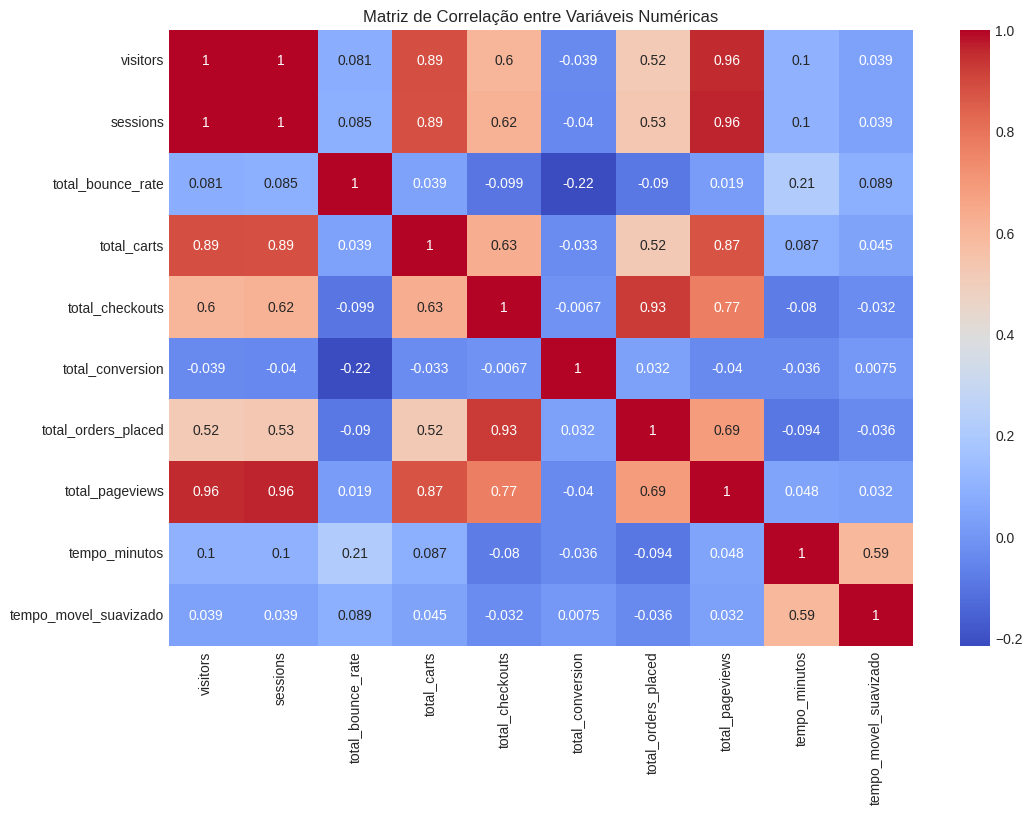

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecionar apenas as colunas numéricas
colunas_numericas = df.select_dtypes(include=['float64', 'int64']).columns

# Calcular a matriz de correlação
matriz_corr = df[colunas_numericas].corr()

# Visualizar a matriz de correlação
plt.figure(figsize=(12,8))
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação entre Variáveis Numéricas')
plt.show()


In [86]:
# Calcular as correlações com o alvo
correlacoes_alvo = matriz_corr['tempo_movel_suavizado'].sort_values(ascending=False)
print("Correlações com 'tempo_movel_suavizado':")
print(correlacoes_alvo)


Correlações com 'tempo_movel_suavizado':
tempo_movel_suavizado    1.000000
tempo_minutos            0.592198
total_bounce_rate        0.089154
total_carts              0.044502
sessions                 0.039273
visitors                 0.039061
total_pageviews          0.031929
total_conversion         0.007456
total_checkouts         -0.032037
total_orders_placed     -0.036419
Name: tempo_movel_suavizado, dtype: float64


In [88]:
from scipy.stats import pearsonr

print("Teste de Correlação de Pearson:")
for coluna in colunas_numericas:
    if coluna != 'tempo_movel_suavizado':
        coeficiente, p_valor = pearsonr(df[coluna], df['tempo_movel_suavizado'])
        print(f"\nCorrelação entre '{coluna}' e 'tempo_movel_suavizado':")
        print(f"Coeficiente de Pearson: {coeficiente:.4f}")
        print(f"Valor-p: {p_valor:.4e}")


Teste de Correlação de Pearson:

Correlação entre 'visitors' e 'tempo_movel_suavizado':
Coeficiente de Pearson: 0.0391
Valor-p: 1.6942e-01

Correlação entre 'sessions' e 'tempo_movel_suavizado':
Coeficiente de Pearson: 0.0393
Valor-p: 1.6712e-01

Correlação entre 'total_bounce_rate' e 'tempo_movel_suavizado':
Coeficiente de Pearson: 0.0892
Valor-p: 1.6823e-03

Correlação entre 'total_carts' e 'tempo_movel_suavizado':
Coeficiente de Pearson: 0.0445
Valor-p: 1.1744e-01

Correlação entre 'total_checkouts' e 'tempo_movel_suavizado':
Coeficiente de Pearson: -0.0320
Valor-p: 2.5981e-01

Correlação entre 'total_conversion' e 'tempo_movel_suavizado':
Coeficiente de Pearson: 0.0075
Valor-p: 7.9319e-01

Correlação entre 'total_orders_placed' e 'tempo_movel_suavizado':
Coeficiente de Pearson: -0.0364
Valor-p: 2.0017e-01

Correlação entre 'total_pageviews' e 'tempo_movel_suavizado':
Coeficiente de Pearson: 0.0319
Valor-p: 2.6143e-01

Correlação entre 'tempo_minutos' e 'tempo_movel_suavizado':
Coef

In [90]:
from scipy.stats import spearmanr

print("\nTeste de Correlação de Spearman:")
for coluna in colunas_numericas:
    if coluna != 'tempo_movel_suavizado':
        coeficiente, p_valor = spearmanr(df[coluna], df['tempo_movel_suavizado'])
        print(f"\nCorrelação entre '{coluna}' e 'tempo_movel_suavizado':")
        print(f"Coeficiente de Spearman: {coeficiente:.4f}")
        print(f"Valor-p: {p_valor:.4e}")



Teste de Correlação de Spearman:

Correlação entre 'visitors' e 'tempo_movel_suavizado':
Coeficiente de Spearman: -0.0193
Valor-p: 4.9635e-01

Correlação entre 'sessions' e 'tempo_movel_suavizado':
Coeficiente de Spearman: -0.0203
Valor-p: 4.7631e-01

Correlação entre 'total_bounce_rate' e 'tempo_movel_suavizado':
Coeficiente de Spearman: 0.1240
Valor-p: 1.2046e-05

Correlação entre 'total_carts' e 'tempo_movel_suavizado':
Coeficiente de Spearman: -0.0383
Valor-p: 1.7746e-01

Correlação entre 'total_checkouts' e 'tempo_movel_suavizado':
Coeficiente de Spearman: -0.1346
Valor-p: 1.9904e-06

Correlação entre 'total_conversion' e 'tempo_movel_suavizado':
Coeficiente de Spearman: -0.1654
Valor-p: 4.7002e-09

Correlação entre 'total_orders_placed' e 'tempo_movel_suavizado':
Coeficiente de Spearman: -0.1606
Valor-p: 1.3228e-08

Correlação entre 'total_pageviews' e 'tempo_movel_suavizado':
Coeficiente de Spearman: -0.0532
Valor-p: 6.1372e-02

Correlação entre 'tempo_minutos' e 'tempo_movel_s

In [92]:
from scipy.stats import spearmanr

print("\nTeste de Correlação de Spearman:")
for coluna in colunas_numericas:
    if coluna != 'tempo_movel_suavizado':
        coeficiente, p_valor = spearmanr(df[coluna], df['tempo_movel_suavizado'])
        print(f"\nCorrelação entre '{coluna}' e 'tempo_movel_suavizado':")
        print(f"Coeficiente de Spearman: {coeficiente:.4f}")
        print(f"Valor-p: {p_valor:.4e}")



Teste de Correlação de Spearman:

Correlação entre 'visitors' e 'tempo_movel_suavizado':
Coeficiente de Spearman: -0.0193
Valor-p: 4.9635e-01

Correlação entre 'sessions' e 'tempo_movel_suavizado':
Coeficiente de Spearman: -0.0203
Valor-p: 4.7631e-01

Correlação entre 'total_bounce_rate' e 'tempo_movel_suavizado':
Coeficiente de Spearman: 0.1240
Valor-p: 1.2046e-05

Correlação entre 'total_carts' e 'tempo_movel_suavizado':
Coeficiente de Spearman: -0.0383
Valor-p: 1.7746e-01

Correlação entre 'total_checkouts' e 'tempo_movel_suavizado':
Coeficiente de Spearman: -0.1346
Valor-p: 1.9904e-06

Correlação entre 'total_conversion' e 'tempo_movel_suavizado':
Coeficiente de Spearman: -0.1654
Valor-p: 4.7002e-09

Correlação entre 'total_orders_placed' e 'tempo_movel_suavizado':
Coeficiente de Spearman: -0.1606
Valor-p: 1.3228e-08

Correlação entre 'total_pageviews' e 'tempo_movel_suavizado':
Coeficiente de Spearman: -0.0532
Valor-p: 6.1372e-02

Correlação entre 'tempo_minutos' e 'tempo_movel_s

In [94]:
# Evitar divisão por zero substituindo zeros por um valor muito pequeno (ou outro tratamento adequado)
df['sessions_ajustado'] = df['sessions'].replace(0, 0.0001)

# Criar as novas features
df['carts_por_sessao'] = df['total_carts'] / df['sessions_ajustado']
df['checkouts_por_sessao'] = df['total_checkouts'] / df['sessions_ajustado']
df['orders_por_sessao'] = df['total_orders_placed'] / df['sessions_ajustado']


In [96]:
# Visualizar as primeiras linhas
df[['sessions', 'total_carts', 'carts_por_sessao', 'total_checkouts', 'checkouts_por_sessao', 'total_orders_placed', 'orders_por_sessao']].head()


sessions  total_carts  carts_por_sessao  total_checkouts  \
0      1741           30          0.017231               18   
1       342           10          0.029240                4   
2        60            1          0.016667                0   
3       288            4          0.013889                1   
4       174            4          0.022989                0   

   checkouts_por_sessao  total_orders_placed  orders_por_sessao  
0              0.010339                    6           0.003446  
1              0.011696                    2           0.005848  
2              0.000000                    0           0.000000  
3              0.003472                    0           0.000000  
4              0.000000                    0           0.000000

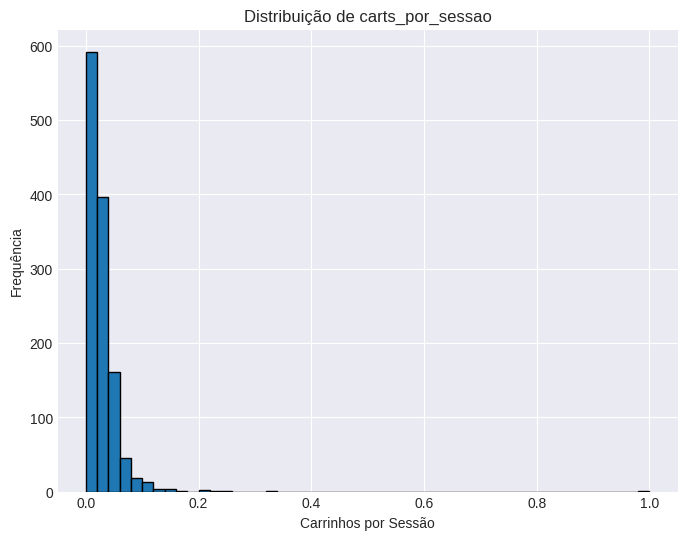

In [98]:
import matplotlib.pyplot as plt

# Histograma de 'carts_por_sessao'
plt.figure(figsize=(8,6))
plt.hist(df['carts_por_sessao'], bins=50, edgecolor='k')
plt.title('Distribuição de carts_por_sessao')
plt.xlabel('Carrinhos por Sessão')
plt.ylabel('Frequência')
plt.show()

# Repetir para as outras features


In [100]:
# Adicionar 'tempo_movel_suavizado' à lista de colunas
colunas_corr = ['tempo_movel_suavizado', 'carts_por_sessao', 'checkouts_por_sessao', 'orders_por_sessao']

# Calcular a matriz de correlação
matriz_corr_novas = df[colunas_corr].corr()

# Exibir as correlações com o alvo
print("Correlações com 'tempo_movel_suavizado':")
print(matriz_corr_novas['tempo_movel_suavizado'].sort_values(ascending=False))


Correlações com 'tempo_movel_suavizado':
tempo_movel_suavizado    1.000000
orders_por_sessao        0.007453
checkouts_por_sessao    -0.009664
carts_por_sessao        -0.026322
Name: tempo_movel_suavizado, dtype: float64


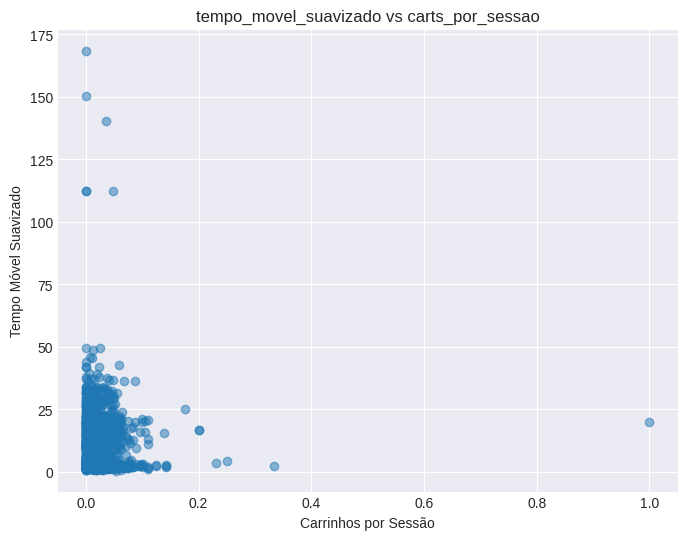

In [102]:
# Scatter plot para 'carts_por_sessao'
plt.figure(figsize=(8,6))
plt.scatter(df['carts_por_sessao'], df['tempo_movel_suavizado'], alpha=0.5)
plt.title('tempo_movel_suavizado vs carts_por_sessao')
plt.xlabel('Carrinhos por Sessão')
plt.ylabel('Tempo Móvel Suavizado')
plt.show()

# Repetir para as outras features


Fitting 3 folds for each of 12 candidates, totalling 36 fits
Melhores hiperparâmetros: {'colsample_bytree': 0.8, 'gamma': 0.5, 'learning_rate': 0.005, 'max_depth': 4, 'min_child_weight': 3, 'n_estimators': 200, 'subsample': 0.8}
RMSE: 8.816431159501734
MAE: 7.285044117096628
R²: 0.21183362798950045


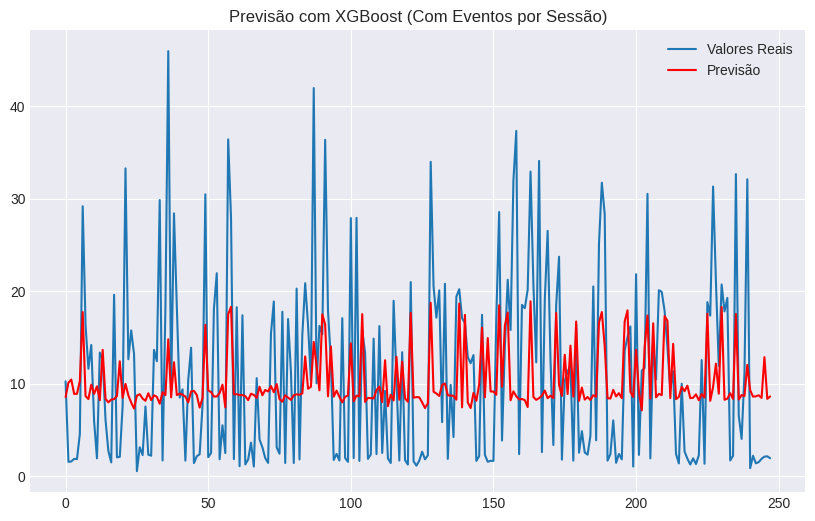

In [104]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb

# Preparar os dados para o modelo

# Selecionar as features
features_modelo = ['tempo_minutos', 'carts_por_sessao', 'checkouts_por_sessao', 'orders_por_sessao']

# Remover quaisquer valores infinitos resultantes da divisão
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Remover linhas com valores nulos
df.dropna(subset=features_modelo + ['tempo_movel_suavizado'], inplace=True)

# Separar as variáveis independentes (X) e dependente (y)
X = df[features_modelo]
y = df['tempo_movel_suavizado']

# Normalizar os dados
scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler.fit_transform(X)

# Criar as features para XGBoost (usando lags se necessário)
# Para simplificar, usaremos as features diretamente sem lags
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Definir o modelo XGBoost
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Definir os hiperparâmetros para testar no GridSearch
param_grid = {
    'n_estimators': [200],
    'learning_rate': [0.002, 0.005],
    'max_depth': [4],
    'subsample': [0.8],
    'colsample_bytree': [0.8],
    'min_child_weight': [1, 3],
    'gamma': [0, 0.1, 0.5]
}

# Configurar o GridSearch
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, 
                           cv=3, n_jobs=2, verbose=2, scoring='neg_mean_squared_error')

# Treinar o modelo com GridSearch
grid_search.fit(X_train, y_train)

# Exibir os melhores hiperparâmetros
print(f"Melhores hiperparâmetros: {grid_search.best_params_}")

# Fazer previsões com o melhor modelo
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calcular RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calcular MAE
mae = mean_absolute_error(y_test, y_pred)

# Calcular R²
r2 = r2_score(y_test, y_pred)

# Exibir todas as métricas
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R²: {r2}")

# Plotar as previsões vs valores reais
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(y_test.values, label='Valores Reais')
plt.plot(y_pred, label='Previsão', color='red')
plt.legend()
plt.title('Previsão com XGBoost (Com Eventos por Sessão)')
plt.show()


                Feature  Importance
0         tempo_minutos    0.557303
2  checkouts_por_sessao    0.167695
3     orders_por_sessao    0.155937
1      carts_por_sessao    0.119065


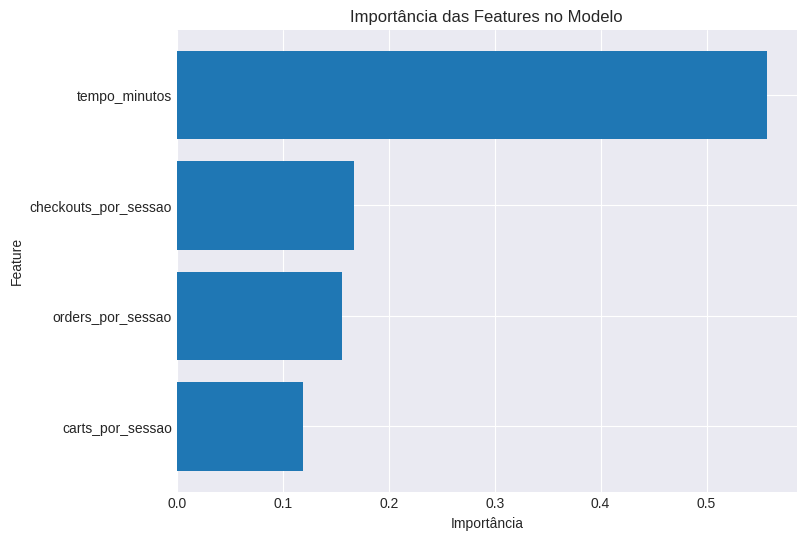

In [106]:
# Obter importâncias das features
importances = best_model.feature_importances_
feature_names = features_modelo

# Criar um DataFrame com as importâncias
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Ordenar por importância
feature_importance_df.sort_values(by='Importance', ascending=False, inplace=True)

# Visualizar
print(feature_importance_df)

# Plotar as importâncias
plt.figure(figsize=(8,6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importância')
plt.ylabel('Feature')
plt.title('Importância das Features no Modelo')
plt.gca().invert_yaxis()
plt.show()


Fitting 3 folds for each of 12 candidates, totalling 36 fits
Melhores hiperparâmetros: {'colsample_bytree': 0.8, 'gamma': 0.1, 'learning_rate': 0.005, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 0.8}
RMSE: 8.826750150829099
MAE: 7.293756499182489
R²: 0.20998756547271358


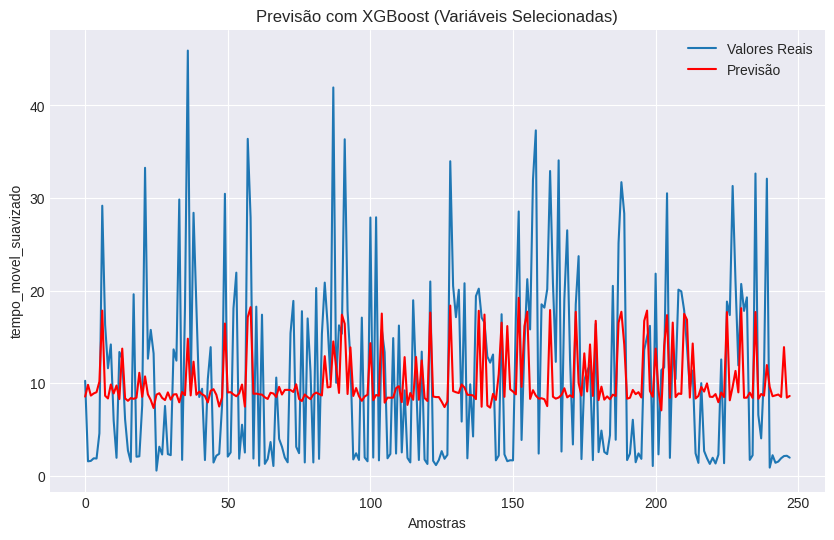

In [108]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb
import matplotlib.pyplot as plt

# Selecionar as features especificadas
features_modelo = ['tempo_minutos', 'checkouts_por_sessao', 'orders_por_sessao', 'carts_por_sessao']

# Tratar valores infinitos e nulos nas features
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(subset=features_modelo + ['tempo_movel_suavizado'], inplace=True)

# Separar as variáveis independentes (X) e dependente (y)
X = df[features_modelo]
y = df['tempo_movel_suavizado']

# Dividir em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar os dados
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Definir o modelo XGBoost
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Definir os hiperparâmetros para testar no GridSearch
param_grid = {
    'n_estimators': [200],
    'learning_rate': [0.002, 0.005],
    'max_depth': [4],
    'subsample': [0.8],
    'colsample_bytree': [0.8],
    'min_child_weight': [1, 3],
    'gamma': [0, 0.1, 0.5]
}

# Configurar o GridSearch
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, 
                           cv=3, n_jobs=2, verbose=2, scoring='neg_mean_squared_error')

# Treinar o modelo com GridSearch
grid_search.fit(X_train_scaled, y_train)

# Exibir os melhores hiperparâmetros
print(f"Melhores hiperparâmetros: {grid_search.best_params_}")

# Fazer previsões com o melhor modelo
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

# Calcular RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calcular MAE
mae = mean_absolute_error(y_test, y_pred)

# Calcular R²
r2 = r2_score(y_test, y_pred)

# Exibir todas as métricas
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R²: {r2}")

# Plotar as previsões vs valores reais
plt.figure(figsize=(10,6))
plt.plot(y_test.values, label='Valores Reais')
plt.plot(y_pred, label='Previsão', color='red')
plt.legend()
plt.title('Previsão com XGBoost (Variáveis Selecionadas)')
plt.xlabel('Amostras')
plt.ylabel('tempo_movel_suavizado')
plt.show()


In [ ]:
# ABAIXO USANDO APENAS UMA VARIÁVEL PREDITORA TEMPO_MINUTOS

Fitting 3 folds for each of 2187 candidates, totalling 6561 fits
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.001, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.001, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.001, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.001, max_depth=3, min_child_weight=1, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.001, max_depth=3, min_child_weight=1, n_estimators=300, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.001, max_depth=3, min_child_weight=1, n_estimators=300, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.001

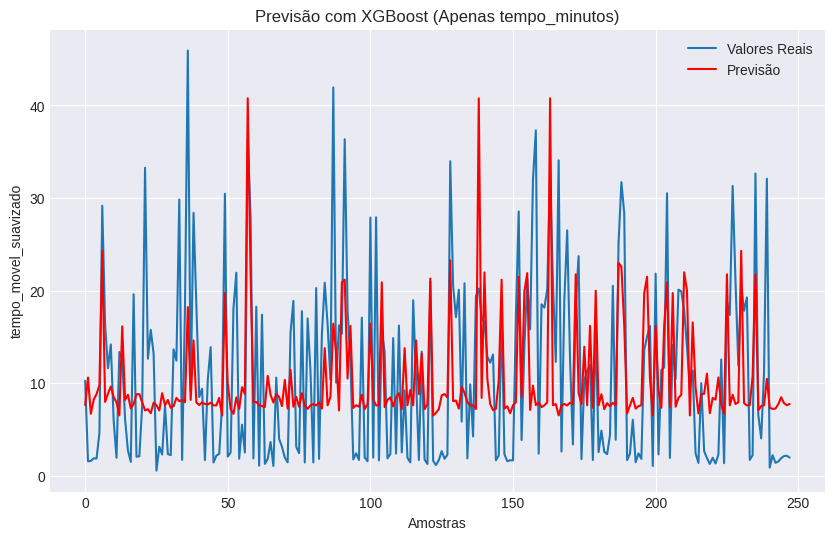

In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Supondo que o DataFrame 'df' já esteja carregado e contém as colunas 'tempo_minutos' e 'tempo_movel_suavizado'

# Garantir que não há valores nulos ou infinitos em 'tempo_minutos' e 'tempo_movel_suavizado'
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(subset=['tempo_minutos', 'tempo_movel_suavizado'], inplace=True)

# Separar as variáveis independentes (X) e dependente (y)
X = df[['tempo_minutos']]
y = df['tempo_movel_suavizado']

# Dividir em conjunto de treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar os dados
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Definir o modelo XGBoost
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Definir os hiperparâmetros para testar no GridSearch
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.001, 0.005, 0.01],
    'max_depth': [3, 4, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.3]
}

# Configurar o GridSearch com validação cruzada de 3 folds
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    cv=3,
    n_jobs=-1,
    verbose=2,
    scoring='neg_mean_squared_error'
)

# Treinar o modelo com GridSearch
grid_search.fit(X_train_scaled, y_train)

# Exibir os melhores hiperparâmetros
print(f"Melhores hiperparâmetros: {grid_search.best_params_}")

# Fazer previsões com o melhor modelo
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

# Calcular RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calcular MAE
mae = mean_absolute_error(y_test, y_pred)

# Calcular R²
r2 = r2_score(y_test, y_pred)

# Exibir todas as métricas
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R²: {r2:.4f}")

# Plotar as previsões vs valores reais
plt.figure(figsize=(10,6))
plt.plot(y_test.values, label='Valores Reais')
plt.plot(y_pred, label='Previsão', color='red')
plt.legend()
plt.title('Previsão com XGBoost (Apenas tempo_minutos)')
plt.xlabel('Amostras')
plt.ylabel('tempo_movel_suavizado')
plt.show()


# ABAIXO TIVEMOS O MELHOR RESULTADO ATÉ AGORA

Fitting 3 folds for each of 192 candidates, totalling 576 fits
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.005, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.005, max_depth=3, min_child_weight=1, n_estimators=200, subsample=1.0; total time=   2.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.005, max_depth=3, min_child_weight=3, n_estimators=200, subsample=0.8; total time=   2.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.005, max_depth=4, min_child_weight=1, n_estimators=100, subsample=1.0; total time=   2.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.005, max_depth=4, min_child_weight=3, n_estimators=100, subsample=0.8; total time=   1.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.005, max_depth=4, min_child_weight=3, n_estimators=100, subsample=0.8; total time=   2.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.005, 

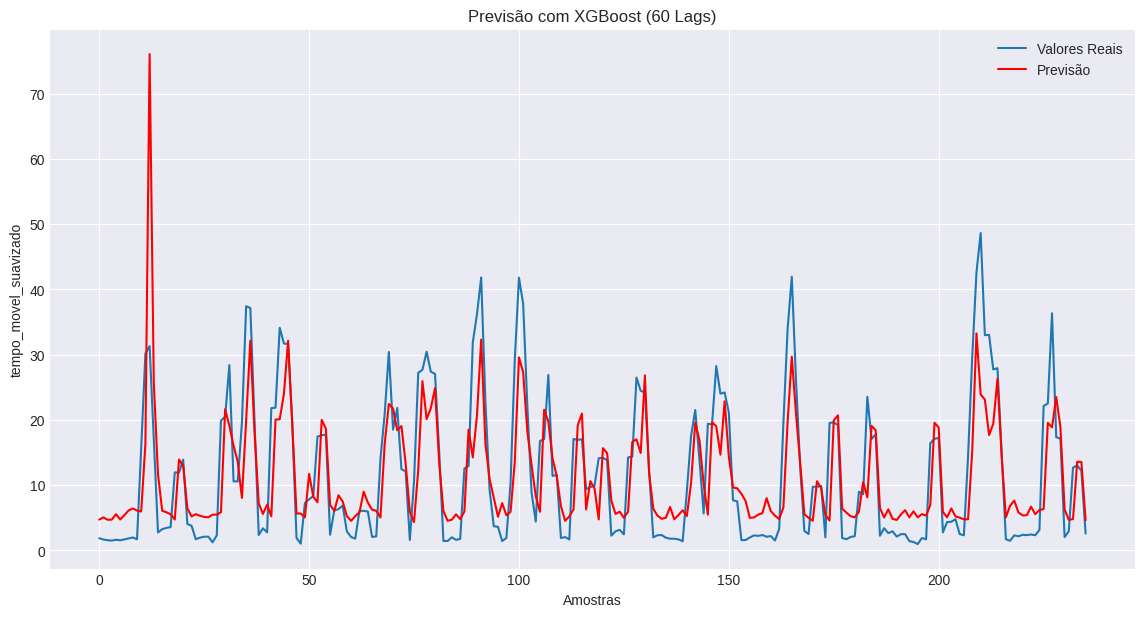

In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb

from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Supondo que o DataFrame 'df' já esteja carregado e contém as colunas 'tempo_minutos' e 'tempo_movel_suavizado'

# Garantir que não há valores nulos ou infinitos nas colunas relevantes
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(subset=['tempo_minutos', 'tempo_movel_suavizado'], inplace=True)

# Ordenar o DataFrame por data se houver uma coluna de data
# Se não houver, certifique-se de que os dados estejam na ordem temporal correta
# df = df.sort_values('data')  # Descomente e ajuste se tiver uma coluna de data

# Função para criar features de lags
def create_lag_features(df, lag_steps):
    df_lag = df.copy()
    for lag in range(1, lag_steps + 1):
        df_lag[f'tempo_movel_suavizado_lag_{lag}'] = df_lag['tempo_movel_suavizado'].shift(lag)
        df_lag[f'tempo_minutos_lag_{lag}'] = df_lag['tempo_minutos'].shift(lag)
    df_lag.dropna(inplace=True)
    return df_lag

# Definir o número de lags
lag_steps = 60  # Ajustado para 60 lags

# Criar as features de lag
df_lagged = create_lag_features(df, lag_steps)

# Separar as variáveis independentes (X) e dependente (y)
features = [col for col in df_lagged.columns if 'lag' in col]
X = df_lagged[features]
y = df_lagged['tempo_movel_suavizado']

# Dividir em conjunto de treino e teste
train_size = int(len(X) * 0.8)
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

# Normalizar os dados
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Definir o modelo XGBoost
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Definir os hiperparâmetros para testar no GridSearch
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.005, 0.01],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'min_child_weight': [1, 3],
    'gamma': [0, 0.1]
}

# Configurar o TimeSeriesSplit para validação cruzada temporal
tscv = TimeSeriesSplit(n_splits=3)

# Configurar o GridSearch com TimeSeriesSplit
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    cv=tscv,
    n_jobs=-1,
    verbose=2,
    scoring='neg_mean_squared_error'
)

# Treinar o modelo com GridSearch
grid_search.fit(X_train_scaled, y_train)

# Exibir os melhores hiperparâmetros
print(f"Melhores hiperparâmetros: {grid_search.best_params_}")

# Fazer previsões com o melhor modelo
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

# Calcular RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calcular MAE
mae = mean_absolute_error(y_test, y_pred)

# Calcular R²
r2 = r2_score(y_test, y_pred)

# Exibir todas as métricas
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R²: {r2:.4f}")

# Plotar as previsões vs valores reais
plt.figure(figsize=(14,7))
plt.plot(y_test.values, label='Valores Reais')
plt.plot(y_pred, label='Previsão', color='red')
plt.legend()
plt.title('Previsão com XGBoost (60 Lags)')
plt.xlabel('Amostras')
plt.ylabel('tempo_movel_suavizado')
plt.show()


# ACIMA TIVEMOS O MELHOR RESULTADO ATÉ AGORA

In [ ]:
# AGORA COM MAIS FEATURES PARA VER SE MELHORAMOS AINDA MAIS O MODELO

Fitting 3 folds for each of 128 candidates, totalling 384 fits
Melhores hiperparâmetros: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 6, 'min_child_weight': 3, 'n_estimators': 200, 'subsample': 0.8}
RMSE: 6.5499
MAE: 5.0273
R²: 0.6520


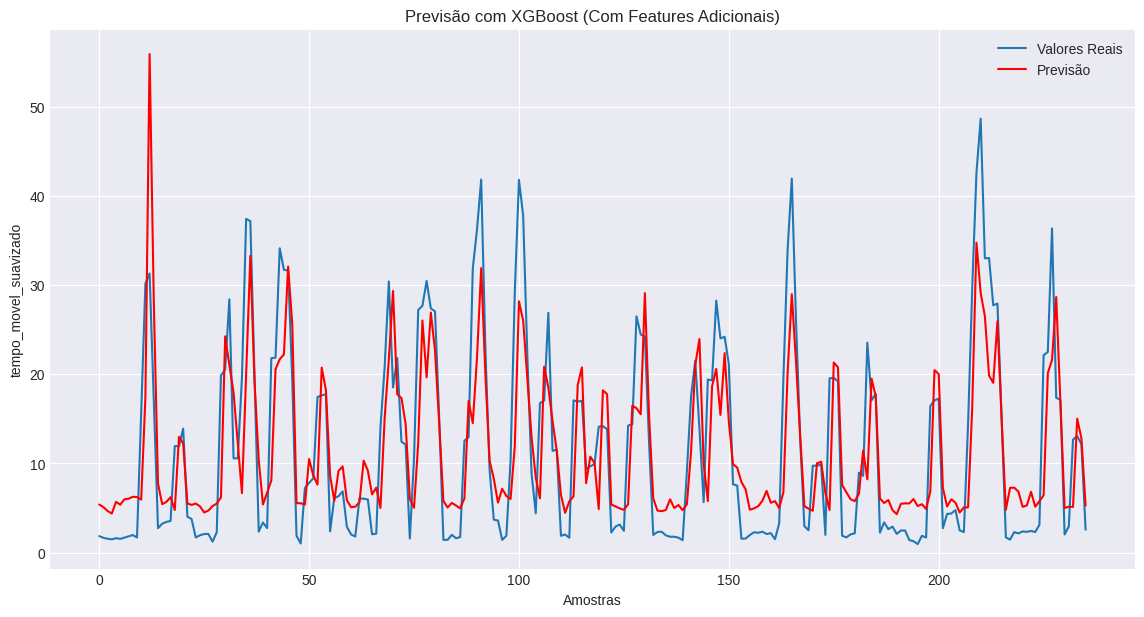

Principais Features:
                          Feature  Importance
145  tempo_movel_suavizado_lag_30    0.058823
50   tempo_movel_suavizado_lag_11    0.033619
131          tempo_minutos_lag_27    0.028290
211          tempo_minutos_lag_43    0.026641
210  tempo_movel_suavizado_lag_43    0.025792
0     tempo_movel_suavizado_lag_1    0.024413
193   checkouts_por_sessao_lag_39    0.017759
205  tempo_movel_suavizado_lag_42    0.017154
70   tempo_movel_suavizado_lag_15    0.017099
154      orders_por_sessao_lag_31    0.016850


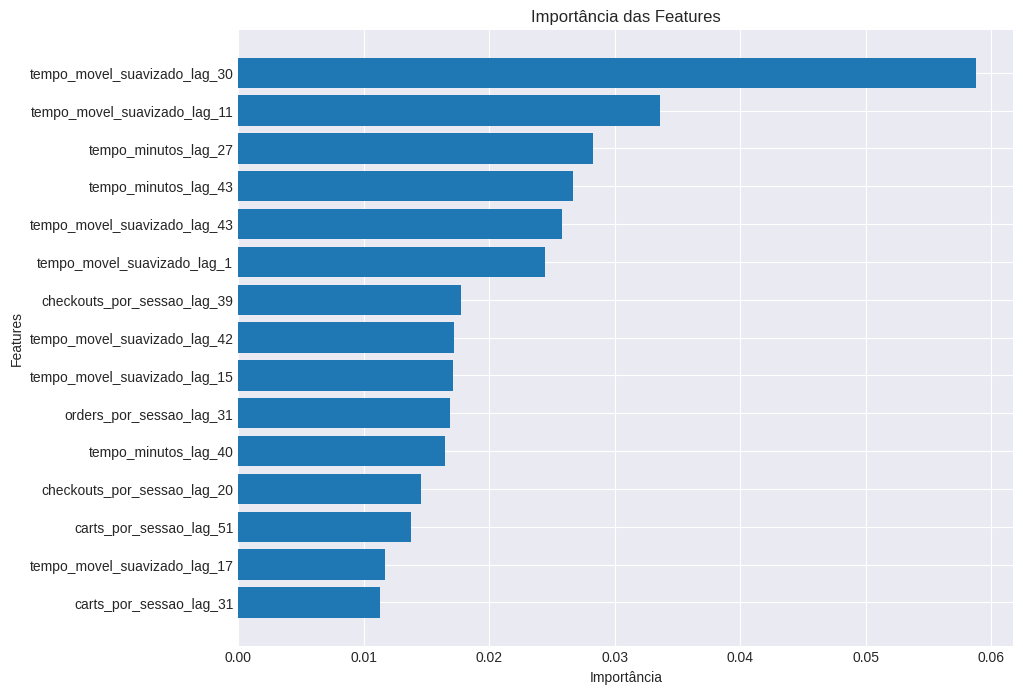

In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb

from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Supondo que o DataFrame 'df' já esteja carregado e contém as colunas necessárias:
# 'tempo_minutos', 'tempo_movel_suavizado', 'sessions', 'total_carts', 'total_checkouts', 'total_orders_placed'

# 1. Preparação dos Dados

# Evitar divisão por zero substituindo zeros em 'sessions' por NaN
df['sessions_ajustado'] = df['sessions'].replace(0, np.nan)

# Calcular as novas features
df['carts_por_sessao'] = df['total_carts'] / df['sessions_ajustado']
df['checkouts_por_sessao'] = df['total_checkouts'] / df['sessions_ajustado']
df['orders_por_sessao'] = df['total_orders_placed'] / df['sessions_ajustado']

# Tratar valores nulos resultantes da divisão
df[['carts_por_sessao', 'checkouts_por_sessao', 'orders_por_sessao']] = df[['carts_por_sessao', 'checkouts_por_sessao', 'orders_por_sessao']].fillna(0)

# Garantir que não há valores nulos ou infinitos nas colunas relevantes
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(subset=['tempo_minutos', 'tempo_movel_suavizado', 'carts_por_sessao', 'checkouts_por_sessao', 'orders_por_sessao'], inplace=True)

# Ordenar o DataFrame por data se houver uma coluna de data
# Se não houver, certifique-se de que os dados estejam na ordem temporal correta
# df = df.sort_values('data')  # Descomente e ajuste se tiver uma coluna de data

# 2. Atualizar a Função de Criação de Features com Lags
def create_lag_features(df, lag_steps):
    df_lag = df.copy()
    for lag in range(1, lag_steps + 1):
        # Lags da variável alvo
        df_lag[f'tempo_movel_suavizado_lag_{lag}'] = df_lag['tempo_movel_suavizado'].shift(lag)
        
        # Lags das variáveis preditoras
        df_lag[f'tempo_minutos_lag_{lag}'] = df_lag['tempo_minutos'].shift(lag)
        df_lag[f'carts_por_sessao_lag_{lag}'] = df_lag['carts_por_sessao'].shift(lag)
        df_lag[f'checkouts_por_sessao_lag_{lag}'] = df_lag['checkouts_por_sessao'].shift(lag)
        df_lag[f'orders_por_sessao_lag_{lag}'] = df_lag['orders_por_sessao'].shift(lag)
    df_lag.dropna(inplace=True)
    return df_lag

# 3. Criar as Features de Lag
lag_steps = 60  # Usando 60 lags

df_lagged = create_lag_features(df, lag_steps)

# 4. Preparar os Dados para o Modelo
features = [col for col in df_lagged.columns if 'lag' in col]

X = df_lagged[features]
y = df_lagged['tempo_movel_suavizado']

# 5. Dividir os Dados em Treino e Teste
train_size = int(len(X) * 0.8)
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

# 6. Normalizar os Dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 7. Treinar o Modelo com GridSearch
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.005, 0.01],
    'max_depth': [4, 6],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'min_child_weight': [1, 3],
    'gamma': [0, 0.1]
}

tscv = TimeSeriesSplit(n_splits=3)

grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    cv=tscv,
    n_jobs=-1,
    verbose=2,
    scoring='neg_mean_squared_error'
)

grid_search.fit(X_train_scaled, y_train)

print(f"Melhores hiperparâmetros: {grid_search.best_params_}")

# 8. Avaliar o Modelo
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R²: {r2:.4f}")

# 9. Visualizar os Resultados
plt.figure(figsize=(14,7))
plt.plot(y_test.values, label='Valores Reais')
plt.plot(y_pred, label='Previsão', color='red')
plt.legend()
plt.title('Previsão com XGBoost (Com Features Adicionais)')
plt.xlabel('Amostras')
plt.ylabel('tempo_movel_suavizado')
plt.show()

# 10. Analisar a Importância das Features
importances = best_model.feature_importances_
feature_names = X.columns

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df.sort_values(by='Importance', ascending=False, inplace=True)

print("Principais Features:")
print(feature_importance_df.head(10))

# Plotar as importâncias
plt.figure(figsize=(10,8))
plt.barh(feature_importance_df['Feature'].head(15), feature_importance_df['Importance'].head(15))
plt.xlabel('Importância')
plt.ylabel('Features')
plt.title('Importância das Features')
plt.gca().invert_yaxis()
plt.show()


### **Análise das Principais Features**

Aqui estão as 10 features mais importantes e suas importâncias relativas:

1. **`tempo_movel_suavizado_lag_30`** (0.058823)
2. **`tempo_movel_suavizado_lag_11`** (0.033619)
3. **`tempo_minutos_lag_27`** (0.028290)
4. **`tempo_minutos_lag_43`** (0.026641)
5. **`tempo_movel_suavizado_lag_43`** (0.025792)
6. **`tempo_movel_suavizado_lag_1`** (0.024413)
7. **`checkouts_por_sessao_lag_39`** (0.017759)
8. **`tempo_movel_suavizado_lag_42`** (0.017154)
9. **`tempo_movel_suavizado_lag_15`** (0.017099)
10. **`orders_por_sessao_lag_31`** (0.016850)

#### **Observações:**

- **Predominância de Lags da Variável Alvo:**
  - A feature mais importante é **`tempo_movel_suavizado_lag_30`**, indicando que o valor da variável alvo há 30 períodos atrás é altamente preditivo do valor atual.
  - Outros lags de `tempo_movel_suavizado` também aparecem entre as principais features, como os lags 11, 43, 1, 42 e 15.

- **Importância de Lags de `tempo_minutos`:**
  - Os lags de `tempo_minutos` nos períodos 27 e 43 são também altamente importantes, sugerindo que o tempo em minutos nesses lags influencia significativamente o valor atual de `tempo_movel_suavizado`.

- **Contribuição das Novas Features:**
  - **`checkouts_por_sessao_lag_39`** e **`orders_por_sessao_lag_31`** aparecem entre as principais features.
  - Isso indica que eventos de checkout e pedidos por sessão em lags específicos têm influência no tempo móvel suavizado atual.

---

### **Interpretação dos Resultados**

- **Dependências Temporais de Médio Prazo:**
  - A presença de lags como 30, 27, 43 sugere que há padrões ou ciclos nos dados que se repetem aproximadamente nessas janelas temporais.
  - Isso pode indicar sazonalidades ou tendências que se manifestam a cada 27-43 unidades de tempo (por exemplo, minutos ou horas, dependendo da granularidade dos seus dados).

- **Importância dos Eventos por Sessão:**
  - A inclusão de **`checkouts_por_sessao_lag_39`** e **`orders_por_sessao_lag_31`** como features importantes reforça que a atividade dos usuários nessas métricas impacta o tempo móvel suavizado.
  - Isso sugere que picos em checkouts e pedidos têm um efeito retardado no tempo que os usuários passam no site.

- **Influência do Lag Imediato:**
  - O lag imediato da variável alvo (**`tempo_movel_suavizado_lag_1`**) também é relevante, o que é comum em séries temporais, pois o valor atual geralmente está correlacionado com o valor anterior.

---

### **Possíveis Ações e Recomendações**

1. **Análise de Sazonalidade e Padrões Cíclicos:**
   - **Objetivo:** Identificar se há padrões sazonais ou cíclicos que correspondem aos lags mais importantes.
   - **Ação:** Visualize a série temporal e utilize ferramentas como análise espectral ou autocorrelação para detectar sazonalidades.
   - **Benefício:** Compreender esses padrões pode ajudar a aprimorar o modelo ou a tomar decisões de negócio informadas.

2. **Explorar Lags Específicos de Outras Variáveis:**
   - **Objetivo:** Verificar se outras features têm lags importantes que não foram considerados.
   - **Ação:** Inclua lags adicionais de outras variáveis, especialmente próximas aos lags 27-43, que se mostraram importantes.
   - **Benefício:** Pode revelar novas relações e melhorar ainda mais o desempenho do modelo.

3. **Simplificação do Modelo:**
   - **Objetivo:** Reduzir a complexidade do modelo, focando nas features mais importantes.
   - **Ação:** Considere remover lags menos importantes ou utilizar técnicas de seleção de features.
   - **Benefício:** Um modelo mais simples pode ser mais interpretável e ter melhor generalização.

4. **Análise de Correlação Cruzada:**
   - **Objetivo:** Quantificar a correlação entre a variável alvo e as features em diferentes lags.
   - **Ação:** Calcule a correlação cruzada para identificar os lags onde a correlação é máxima.
   - **Benefício:** Confirma e quantifica a importância dos lags identificados.

5. **Investigar Eventos Externos ou Internos:**
   - **Objetivo:** Identificar se eventos específicos estão influenciando os lags importantes.
   - **Ação:** Verifique logs de atividades, campanhas de marketing ou eventos sazonais que possam coincidir com os lags destacados.
   - **Benefício:** Compreender o impacto desses eventos pode levar a ações estratégicas para otimizar o engajamento dos usuários.

6. **Ajuste Fino dos Hiperparâmetros:**
   - **Objetivo:** Explorar se ajustes nos hiperparâmetros podem melhorar ainda mais o modelo.
   - **Ação:** Experimente valores diferentes para parâmetros como `max_depth`, `n_estimators`, `learning_rate`, etc.
   - **Benefício:** Pode aumentar a precisão das previsões e a capacidade do modelo de capturar padrões complexos.

7. **Considerar Técnicas de Regularização:**
   - **Objetivo:** Evitar overfitting devido ao grande número de features.
   - **Ação:** Ajuste parâmetros de regularização como `reg_alpha` (L1) e `reg_lambda` (L2) no XGBoost.
   - **Benefício:** Pode melhorar a generalização do modelo em dados não vistos.

---

### **Considerações Finais**

- **Validação do Modelo:**
  - Os resultados mostram que o modelo está capturando efetivamente as dependências temporais e que as novas features adicionadas estão contribuindo positivamente.
  - Um R² de aproximadamente **0.6520** indica que o modelo explica uma porção significativa da variabilidade nos dados.

- **Interpretação de Negócio:**
  - A identificação de lags específicos como altamente importantes pode fornecer insights valiosos sobre o comportamento dos usuários ao longo do tempo.
  - Compreender por que certos períodos passados influenciam o presente pode ajudar na elaboração de estratégias para melhorar o engajamento e conversão.

- **Próximos Passos:**
  - Continue explorando e refinando o modelo com base nas observações feitas.
  - Considere envolver stakeholders do negócio para interpretar os resultados no contexto operacional e estratégico.

---



In [ ]:
# ACIMA TIVEMOS O MELHOR RESUTADO ATÉ AGORA

In [ ]:
# ABAIXO SEGUE MAIS ALGUMAS TENTATIVAS DE MELHORA - O CODIGO A SEGUIR PRECISA DE MUITO RECURSO COMPUTACIONAL

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb

from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Supondo que o DataFrame 'df' já esteja carregado e contém as colunas necessárias:
# 'tempo_minutos', 'tempo_movel_suavizado', 'sessions', 'total_carts', 'total_checkouts', 'total_orders_placed'

# 1. Preparação dos Dados

# Evitar divisão por zero substituindo zeros em 'sessions' por NaN
df['sessions_ajustado'] = df['sessions'].replace(0, np.nan)

# Calcular as novas features
df['carts_por_sessao'] = df['total_carts'] / df['sessions_ajustado']
df['checkouts_por_sessao'] = df['total_checkouts'] / df['sessions_ajustado']
df['orders_por_sessao'] = df['total_orders_placed'] / df['sessions_ajustado']

# Tratar valores nulos resultantes da divisão
df[['carts_por_sessao', 'checkouts_por_sessao', 'orders_por_sessao']] = df[['carts_por_sessao', 'checkouts_por_sessao', 'orders_por_sessao']].fillna(0)

# Garantir que não há valores nulos ou infinitos nas colunas relevantes
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(subset=['tempo_minutos', 'tempo_movel_suavizado', 'carts_por_sessao', 'checkouts_por_sessao', 'orders_por_sessao'], inplace=True)

# Ordenar o DataFrame por data se houver uma coluna de data
# Se não houver, certifique-se de que os dados estejam na ordem temporal correta
# df = df.sort_values('data')  # Descomente e ajuste se tiver uma coluna de data

# 2. Atualizar a Função de Criação de Features com Lags
def create_lag_features(df, lag_steps):
    df_lag = df.copy()
    for lag in range(1, lag_steps + 1):
        # Lags da variável alvo
        df_lag[f'tempo_movel_suavizado_lag_{lag}'] = df_lag['tempo_movel_suavizado'].shift(lag)
        
        # Lags das variáveis preditoras
        df_lag[f'tempo_minutos_lag_{lag}'] = df_lag['tempo_minutos'].shift(lag)
        df_lag[f'carts_por_sessao_lag_{lag}'] = df_lag['carts_por_sessao'].shift(lag)
        df_lag[f'checkouts_por_sessao_lag_{lag}'] = df_lag['checkouts_por_sessao'].shift(lag)
        df_lag[f'orders_por_sessao_lag_{lag}'] = df_lag['orders_por_sessao'].shift(lag)
    df_lag.dropna(inplace=True)
    return df_lag

# 3. Criar as Features de Lag
lag_steps = 60  # Usando 60 lags

df_lagged = create_lag_features(df, lag_steps)

# 4. Preparar os Dados para o Modelo
features = [col for col in df_lagged.columns if 'lag' in col]

X = df_lagged[features]
y = df_lagged['tempo_movel_suavizado']

# 5. Dividir os Dados em Treino e Teste
train_size = int(len(X) * 0.8)
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

# 6. Normalizar os Dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 7. Treinar o Modelo com GridSearch incluindo reg_alpha e reg_lambda
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.005, 0.01, 0.05],
    'max_depth': [4, 6, 8],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [1, 1.5, 2]
}

tscv = TimeSeriesSplit(n_splits=3)

grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    cv=tscv,
    n_jobs=-1,
    verbose=2,
    scoring='neg_mean_squared_error'
)

grid_search.fit(X_train_scaled, y_train)

print(f"Melhores hiperparâmetros: {grid_search.best_params_}")

# 8. Avaliar o Modelo
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R²: {r2:.4f}")

# 9. Visualizar os Resultados
plt.figure(figsize=(14,7))
plt.plot(y_test.values, label='Valores Reais')
plt.plot(y_pred, label='Previsão', color='red')
plt.legend()
plt.title('Previsão com XGBoost (Ajuste de Hiperparâmetros)')
plt.xlabel('Amostras')
plt.ylabel('tempo_movel_suavizado')
plt.show()

# 10. Analisar a Importância das Features
importances = best_model.feature_importances_
feature_names = X.columns

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df.sort_values(by='Importance', ascending=False, inplace=True)

print("Principais Features:")
print(feature_importance_df.head(10))

# Plotar as importâncias
plt.figure(figsize=(10,8))
plt.barh(feature_importance_df['Feature'].head(15), feature_importance_df['Importance'].head(15))
plt.xlabel('Importância')
plt.ylabel('Features')
plt.title('Importância das Features')
plt.gca().invert_yaxis()
plt.show()
